# Telecom Churn Case Study

## **Problem Statement**
Business problem overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Understanding and defining churn
There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully. Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

This project is based on the Indian and Southeast Asian market.

Definitions of churn
There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, you will use the usage-based definition to define churn.

High-value churn
In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

Understanding the business objective and the data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

Understanding customer behaviour during churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

# Versions Used :
- Python 3.8.8
- scikit-learn 0.23.1
- mglearn 0.1.9

***NOTE:- It almost takes 1Hr 45Mins for the whole code to execute on a machine with Standard RAM Configurations.***

## Step 1: Data Understanding, Preparation & Feature Engineering

In [ ]:
#Importing Necessary Libraries
import math
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',250)
pd.set_option('display.max_rows',40)
pd.options.display.float_format = '{:.8f}'.format
%config IPCompleter.greedy=True
pd.options.mode.chained_assignment = None

C:\Users\Hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [ ]:
#Read telecom data
telecom_churn_data = pd.read_csv(r"telecom_churn_data.csv", encoding='ISO-8859-1', dtype='object')
telecom_churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.1,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,5.44,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/

In [ ]:
#Shape 
telecom_churn_data.shape

(99999, 226)

In [ ]:
#Replacing NAs with 0 in respective columns
telecom_churn_data['total_rech_data_6'].fillna('0',inplace=True)
telecom_churn_data['total_rech_data_7'].fillna('0',inplace=True)

telecom_churn_data['av_rech_amt_data_6'].fillna('0',inplace=True)
telecom_churn_data['av_rech_amt_data_7'].fillna('0',inplace=True)

telecom_churn_data['total_rech_amt_6'].fillna('0',inplace=True)
telecom_churn_data['total_rech_amt_7'].fillna('0',inplace=True)

### Dummification for Categorical Variables

In [ ]:
#Categorical variables treatment and dummy creation
categorical_var = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']


for v in categorical_var:
    #Impute nan as 0 for categoricals
     telecom_churn_data[v].fillna('0',inplace=True)


for v in categorical_var:
    #Add dummy
    cont = pd.get_dummies(telecom_churn_data[v],prefix=v,drop_first=True)
    telecom_churn_data = pd.concat([telecom_churn_data,cont],axis=1)

In [ ]:
#Drop the categorical vars now
telecom_churn_data = telecom_churn_data.drop(categorical_var,axis=1)
telecom_churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1,night_pck_user_7_1,night_pck_user_8_1,fb_user_6_1,fb_user_7_1,fb_user_8_1
0,7000842753,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.1,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,0,0,5.44,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,

### Datatype Conversion & Data Cleanup

In [ ]:
#Count the null values in each column
na_cols = telecom_churn_data.isna().sum()
print(na_cols)

mobile_number            0
circle_id                0
loc_og_t2o_mou        1018
std_og_t2o_mou        1018
loc_ic_t2o_mou        1018
                      ... 
night_pck_user_7_1       0
night_pck_user_8_1       0
fb_user_6_1              0
fb_user_7_1              0
fb_user_8_1              0
Length: 226, dtype: int64


In [ ]:
#Ensure None of the churned attributes is in the Big Null count columns
churned_attributes = ('total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9')

#Big NAs columns
na_cols = na_cols[na_cols.values > (0.4*len(telecom_churn_data))]
print (set(na_cols.index.tolist()).intersection(set(churned_attributes)))

set()


In [ ]:
#Drop the column which have more than 40% null values
main_df = telecom_churn_data.dropna(thresh=len(telecom_churn_data)*0.4, axis=1)
main_df.shape

(99999, 196)

In [ ]:
#check for columns having only one unique value, i.e. same value for all the rows.
unique = main_df.nunique()
unique = unique[unique.values == 1]
print (unique)

#Delete the columns with unique value 1
main_df.drop(labels = list(unique.index), axis=1, inplace=True)
main_df.shape

circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
last_date_of_month_9    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_og_t2c_mou_9        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_9        1
dtype: int64


(99999, 180)

In [ ]:
#We will drop any rows having > 100 NA values. 
print(len(main_df[main_df.isnull().sum(axis=1) > 100].index))
main_df.drop(main_df[main_df.isnull().sum(axis=1) > 100].index, axis=0, inplace=True)
main_df.shape
main_df = main_df.set_index('mobile_number')

1018


In [ ]:
#Calculate the percentage of missing values in each column of the dataframe
round(100*(main_df.isnull().sum()/len(main_df.index)),2)

arpu_6               0.00000000
arpu_7               0.00000000
arpu_8               0.00000000
arpu_9               0.00000000
onnet_mou_6          2.95000000
                        ...    
night_pck_user_7_1   0.00000000
night_pck_user_8_1   0.00000000
fb_user_6_1          0.00000000
fb_user_7_1          0.00000000
fb_user_8_1          0.00000000
Length: 179, dtype: float64

In [ ]:
#Impute some missing values
#All MOUs / OG / IC with 0 
for col in [ col for col in main_df.columns if any(ext in col for ext in ['_mou_', 'og_', 'ic_'])]:
    main_df[col].fillna('0',inplace=True)


In [ ]:
round(100*(main_df.isnull().sum()/len(main_df.index)),2)

arpu_6               0.00000000
arpu_7               0.00000000
arpu_8               0.00000000
arpu_9               0.00000000
onnet_mou_6          0.00000000
                        ...    
night_pck_user_7_1   0.00000000
night_pck_user_8_1   0.00000000
fb_user_6_1          0.00000000
fb_user_7_1          0.00000000
fb_user_8_1          0.00000000
Length: 179, dtype: float64

***Here we can notice that the data is clean to work with.***

In [ ]:
#convert columns to float type
def convert_to_numeric(df, column_exclusions_pattern=['mobile','date','churned']):
    float_columns = [col for col in df.columns if not [v for v in column_exclusions_pattern if v in col]]
    for c in float_columns:
        df[c] = df[c].astype(float)
    return df

In [ ]:
#Convert datatypes    
main_df = convert_to_numeric(main_df)
date_columns = [ col for col in main_df.columns if 'date' in col]

# For date columns, replace nan with empty string
for col in date_columns:
    main_df[col].fillna('',inplace=True)
    main_df[col] = main_df[col].apply(lambda x : datetime(1970, 12, 31) \
                                      if not x else datetime.strptime(str(x), '%m/%d/%Y'))  

main_df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1,night_pck_user_7_1,night_pck_user_8_1,fb_user_6_1,fb_user_7_1,fb_user_8_1
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,197.38500000,214.81600000,213.80300000,21.10000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.16000000,0.00000000,0.00000000,0.00000000,4.13000000,0.00000000,0.00000000,0.00000000,1.15000000,0.00000000,0.00000000,0.00000000,5.44000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,5.4

### Outlier Treatment with IQR

In [ ]:
outlier_range  = (0.0001, 0.9999)
float_columns = [c for c in main_df.select_dtypes(['float', 'integer']).columns]

#Checking outliers at 25%,50%,75%,90%,95% and 99%
main_df[float_columns].describe(percentiles=[outlier_range[0],.25,.5,.75,.90,.95,.99, outlier_range[1]])

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1,night_pck_user_7_1,night_pck_user_8_1,fb_user_6_1,fb_user_7_1,fb_user_8_1
count,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000,98981.00000000

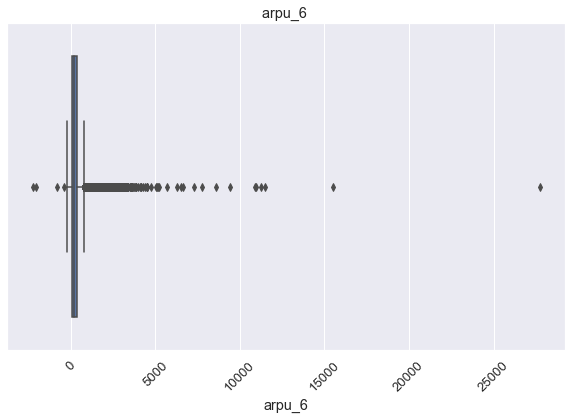

In [ ]:
#Lets check few of the variables with box plot 
sns.set(font_scale=1.2)
plt.figure(figsize=(10,6))
sns.boxplot(data =main_df, x='arpu_6')
plt.title('arpu_6 ')
plt.xticks(rotation=45)
plt.show()

***From the above Boxplot we can notice that most of the columns have outliers at min and max levels. In order not to loose any data we will put outlier range to [0.0001,0.9999]***

In [ ]:
def IQR (df, column):
    q1 = df[column].quantile(outlier_range[0])
    q3 = df[column].quantile(outlier_range[1])
    iqr = (df[column] >= q1) & (df[column] <= q3)
    return df.loc[iqr]

for c in float_columns:
    main_df = IQR(main_df, c)

main_df[float_columns].describe(percentiles=[outlier_range[0],.25,.5,.75,.90,.95,.99, outlier_range[1]])

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1,night_pck_user_7_1,night_pck_user_8_1,fb_user_6_1,fb_user_7_1,fb_user_8_1
count,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000,97323.00000000

In [ ]:
main_df.shape

(97323, 179)

In [ ]:
#Save the cleaned dataset 
main_df.to_pickle("./dummy.pkl")

In [ ]:
unpickled_df = pd.read_pickle("./dummy.pkl")
df = unpickled_df

### Filter high-value customers
Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase). After filtering the high-value customers, you should get about 29K rows

In [ ]:
avg_recharge_f2m = df[['total_rech_amt_6', 'total_rech_amt_7']].mean(axis=1)
X = np.percentile(avg_recharge_f2m, 70)
print (X)

364.0


In [ ]:
df = df[avg_recharge_f2m >= X]
df.shape

(29201, 179)

### Tag churners and remove attributes of the churn phase
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [ ]:
df['churned'] = df.apply(lambda row : 
                         1 if (
                             row.total_ic_mou_9 == 0.0 and 
                             row.total_og_mou_9 == 0.0 and 
                             row.vol_2g_mb_9 == 0.0 and 
                             row.vol_3g_mb_9 == 0.0
                         ) 
                         else 
                         0, 
                         axis=1
                        )

df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1,night_pck_user_7_1,night_pck_user_8_1,fb_user_6_1,fb_user_7_1,fb_user_8_1,churned
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,1069.18000000,1349.85000000,3171.48000000,500.00000000,57.84000000,54.68000000,52.29000000,0.00000000,453.43000000,567.16000000,325.91000000,0.00000000,16.23000000,33.49000000,31.64000000,0.00000000,23.74000000,12.59000000,38.06000000,0.00000000,51.39000000,31.38000000,40.28000000,0.00000000,308.63000000,447.38000000,162.28000000,0.00000000,62.13000000,55.14000000,53.23000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,422.16000000,533.91000000,255.79000000,0.00000000,4.30000000,23.29000000,12.01000000,0.00000000,49.89000000,31.76000000,49.14000000,0.00000000,6.66000000,20.08000000,16.68000000,0.00000000,60.86000000,75.14000000,77.84000000,0.00000000,0.00000000,0.18000000,10.01000000,0.00000000,4.50000000,0.00000000,6.50000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,487.53000000,609.24000000,350.16000000,0.00000000,58.14000000,32.26000000,27.31000000,0.00000000,217.56000000,221.49000000,121.19000000,0.00000000,152.16000000,101.46000000,39.53000000,0.00000000,427.88000000,355.23000000,188.04000000,0.00000000,36.89000000,11.83000000,30.39000000,0.00000000,91.44000000,126.99000000,141.33000000,0.00000000,52.19000000,34.2400000

In [ ]:
#Remove any or all attr with '_9'
df = df.drop(columns = [col for col in df.columns if '_9' in col])
print (df.shape)
df.head()

(29201, 139)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1,night_pck_user_7_1,night_pck_user_8_1,fb_user_6_1,fb_user_7_1,fb_user_8_1,churned
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,1069.18000000,1349.85000000,3171.48000000,57.84000000,54.68000000,52.29000000,453.43000000,567.16000000,325.91000000,16.23000000,33.49000000,31.64000000,23.74000000,12.59000000,38.06000000,51.39000000,31.38000000,40.28000000,308.63000000,447.38000000,162.28000000,62.13000000,55.14000000,53.23000000,0.00000000,0.00000000,0.00000000,422.16000000,533.91000000,255.79000000,4.30000000,23.29000000,12.01000000,49.89000000,31.76000000,49.14000000,6.66000000,20.08000000,16.68000000,60.86000000,75.14000000,77.84000000,0.00000000,0.18000000,10.01000000,4.50000000,0.00000000,6.50000000,0.00000000,0.00000000,0.00000000,487.53000000,609.24000000,350.16000000,58.14000000,32.26000000,27.31000000,217.56000000,221.49000000,121.19000000,152.16000000,101.46000000,39.53000000,427.88000000,355.23000000,188.04000000,36.89000000,11.83000000,30.39000000,91.44000000,126.99000000,141.33000000,52.19000000,34.24000000,22.21000000,180.54000000,173.08000000,193.94000000,626.46000000,558.04000000,428.74000000,0.21000000,0.00000000,0.00000000,2.06000000,14.53000000,31.59000000,15.74000000,15.19000000,15.14000000,5.00000000,5.00000000,7.00000000,1580.00000000,790.00000000,3638.00000000,1580.00000000,790.00000000,1580.00000000,2014-06-27,2014-07-25,2014-08-26,0.00000000,0.00000000,779.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,802.00000000,57.74000000,19.38000000,18.74000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1
7001524846,378.72100000,492.22300000,137.36200000,413.69000000,351.03000000,35.08000000,94.66000000,80.63000000,136.48000000,0.00000000,0.00000000,0.00000000,0

### Derive new features
This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

In [ ]:
#For the date columns missing values, we imputed earlier with infinity start == 1970/12/31.... 
#Now those get replaced as 0 for days
def day_diff_from(column, df):
    return [v.days for v in (df[column].dt.to_pydatetime() - datetime(1970, 12, 31))]

#Extract the day of recharge from the date (0 for missing values in original dataset)
df['day_of_last_rech_6'] =  day_diff_from('date_of_last_rech_6', df)
df['day_of_last_rech_7'] = day_diff_from('date_of_last_rech_7', df)
df['day_of_last_rech_8'] = day_diff_from('date_of_last_rech_8', df)
df = df.drop(columns = [col for col in df.columns if 'date_of_last_rech_' in col])

In [ ]:
#Total amount = total number of recharges * avg amount
df['total_data_rech_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['total_data_rech_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']

#Total Data+Call amount
df['total_amt_6'] = df['total_rech_amt_6'] + df['total_data_rech_6']
df['total_amt_7'] = df['total_rech_amt_7'] + df['total_data_rech_7']

#Average amount
df['avg_amt_6_7'] = df[['total_amt_6', 'total_amt_7']].mean(axis=1)

df = convert_to_numeric(df)

In [ ]:
#Average outgoing calls for 6th and 7th month
df['avg_og_mou_6_7'] = df[['total_og_mou_6', 'total_og_mou_7']].mean(axis=1)

#Outgoing calls usage differnce b/w 8th month and avg of 6th and 7th month. To get insight of customers who are about to churn.
df['usage_diff_og_mou'] = df['avg_og_mou_6_7'] - df['total_og_mou_8']

df = df.drop(['avg_og_mou_6_7'], axis=1)

In [ ]:
#Convert Age on network in months
df['aon'] = df['aon']/30.41

In [ ]:
df['aon'].head()

mobile_number
7000701601   26.37290365
7001524846   10.35843473
7002191713   85.72837882
7000875565   16.80368300
7000187447   21.93357448
Name: aon, dtype: float64

#### Categorize users based on the Network Type -> 2G, 3G, Both

In [ ]:
def find_2g_user(df):
    return df['vol_2g_mb_8']>0 or df['monthly_2g_8']>0 or df['sachet_2g_8']>0

df['2g_user'] = df.apply(find_2g_user, axis=1)

def find_3g_user(df):
    return df[ 'vol_3g_mb_8']>0 or df[ 'monthly_3g_8']>0 or df[ 'sachet_3g_8']>0 or df[ 'aug_vbc_3g']>0

df['3g_user'] = df.apply(find_3g_user, axis=1)


def assign_user_type(df):
    if df['2g_user']:
        return '2g'
    elif df['3g_user']:
        return '3g'
    else:
        return 'both'
df['user_type'] = df.apply(assign_user_type, axis=1)
df = df.drop(['2g_user','3g_user'], axis=1)

In [ ]:
def find_monthly_user(df):
    return df['monthly_2g_8']>0 or df['monthly_3g_8']>0

df['monthly_user'] = df.apply(find_monthly_user, axis=1)

def find_sachet_user(df):
    return df[ 'sachet_2g_8']>0 or df[ 'sachet_3g_8']>0

df['sachet_user'] = df.apply(find_sachet_user, axis=1)

def find_fb_user(df):
    return df['fb_user_8_1']>0 

df['fb_user'] = df.apply(find_fb_user, axis=1)

def find_night_user(df):
    return df['night_pck_user_8_1']>0 

df['night_user'] = df.apply(find_night_user, axis=1)

def assign_service_type(df):
    if df['monthly_user']:
        return 'monthly'
    elif df['sachet_user']:
        return 'sachet'
    elif df['fb_user']:
        return 'fb'
    elif df['night_user']:
        return 'night'
    else:
        return 'none'
    
df['service_used'] = df.apply(assign_service_type, axis=1)
df = df.drop(['monthly_user','sachet_user','fb_user','night_user'], axis=1)

In [ ]:
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1,night_pck_user_7_1,night_pck_user_8_1,fb_user_6_1,fb_user_7_1,fb_user_8_1,churned,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,avg_amt_6_7,usage_diff_og_mou,user_type,service_used
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,1069.18000000,1349.85000000,3171.48000000,57.84000000,54.68000000,52.29000000,453.43000000,567.16000000,325.91000000,16.23000000,33.49000000,31.64000000,23.74000000,12.59000000,38.06000000,51.39000000,31.38000000,40.28000000,308.63000000,447.38000000,162.28000000,62.13000000,55.14000000,53.23000000,0.00000000,0.00000000,0.00000000,422.16000000,533.91000000,255.79000000,4.30000000,23.29000000,12.01000000,49.89000000,31.76000000,49.14000000,6.66000000,20.08000000,16.68000000,60.86000000,75.14000000,77.84000000,0.00000000,0.18000000,10.01000000,4.50000000,0.00000000,6.50000000,0.00000000,0.00000000,0.00000000,487.53000000,609.24000000,350.16000000,58.14000000,32.26000000,27.31000000,217.56000000,221.49000000,121.19000000,152.16000000,101.46000000,39.53000000,427.88000000,355.23000000,188.04000000,36.89000000,11.83000000,30.39000000,91.44000000,126.99000000,141.33000000,52.19000000,34.24000000,22.21000000,180.54000000,173.08000000,193.94000000,626.46000000,558.04000000,428.74000000,0.21000000,0.00000000,0.00000000,2.06000000,14.53000000,31.59000000,15.74000000,15.19000000,15.14000000,5.00000000,5.00000000,7.00000000,1580.00000000,790.00000000,3638.00000000,1580.00000000,790.00000000,1580.00000000,0.00000000,0.00000000,779.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,26.37290365,57.74000000,19.38000000,18.74000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1,15884.00000000,15912.00000000,15944.00000000,0.00000000,0.00000000,1580.000

## Step 2: EDA

### Univariate Analysis

#### 1 - Outgoing Calls
In this section we will analyze outgoing call durations of the churned customers.

In [ ]:
def univariate_continuous(df,col,lbl,title):
    sns.distplot(df[col])
    plt.xlabel(lbl)
    plt.title(title)
    plt.show()

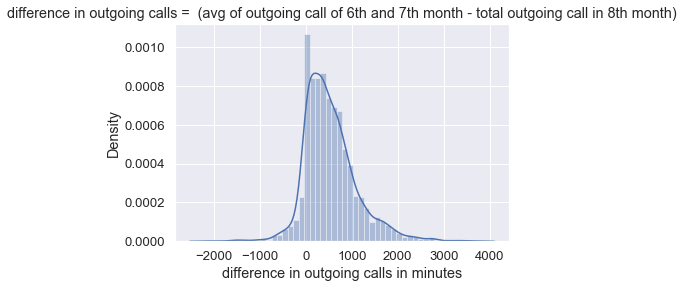

In [ ]:
univariate_continuous(df=df[df['churned']==1],col='usage_diff_og_mou',title ='difference in outgoing calls =  (avg of outgoing call of 6th and 7th month - total outgoing call in 8th month)',lbl = 'difference in outgoing calls in minutes')

***Lets analyze the above graph further and plot difference in outgoing calls in range of -500 to 2000 Mins.***

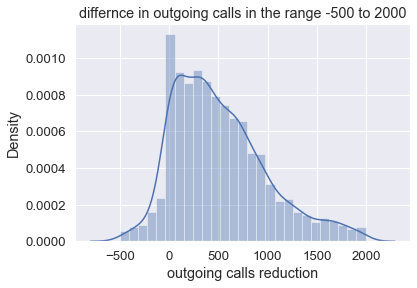

In [ ]:
univariate_continuous(df=df[df['churned']==1].loc[(df[df['churned']==1]['usage_diff_og_mou']>=-500) & (df[df['churned']==1]['usage_diff_og_mou']<=2000)],col='usage_diff_og_mou', lbl='outgoing calls reduction', title='differnce in outgoing calls in the range -500 to 2000')

***From the above graph we can notice that the customers whose outgoing calls have reduced in 8th Month in the range of 100 to 500 Mins have churned more in numbers.***

#### 2 - Age on Network
In this section we will analyze the customers who have churned against the number of months they were on network.

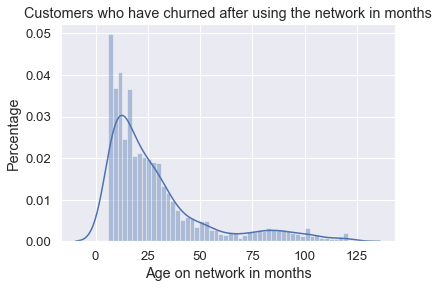

In [ ]:
sns.distplot(df[df['churned']==1]['aon'], bins=50)
plt.xlabel('Age on network in months')
plt.ylabel('Percentage')
plt.title('Customers who have churned after using the network in months')
plt.show()

***Here we can notice that the customers are less likely to churn who have high age on Network.***

#### 3 - Recharge Amount
In this section we will analyze the customers who have churned against the recharge amount done in the 8th Month.

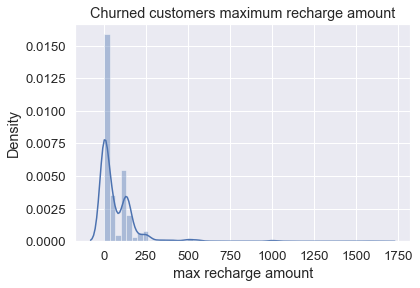

In [ ]:
univariate_continuous(df=df[df['churned']==1],col='max_rech_amt_8',lbl='max recharge amount', title='Churned customers maximum recharge amount')

***Here we can notice that the customers who have recharged less than Rs 200 are more likely to churn.***

### Bivariate Analysis

#### 1 - Type of Network -> 2G, 3G, Both
We analyze the churned customers based on the network type used. 'user_type' derived variable is used here for analysis.

In [ ]:
df[['user_type', 'churned']].groupby(['user_type', 'churned']).size()/df.groupby(['user_type']).size()

user_type  churned
2g         0         0.97186167
           1         0.02813833
3g         0         0.92213115
           1         0.07786885
both       0         0.87551590
           1         0.12448410
dtype: float64

***Here we can notice that the percentage wise customers who have churned and not churned from different type of networks.***

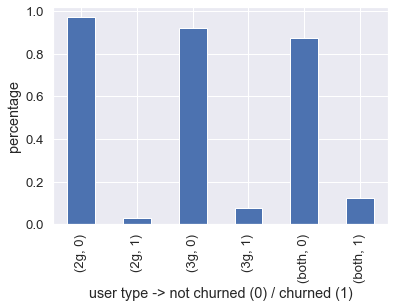

In [ ]:
(df[['user_type', 'churned']].groupby(['user_type', 'churned']).size()/df.groupby(['user_type']).size()).plot.bar()
plt.xlabel("user type -> not churned (0) / churned (1)")
plt.ylabel("percentage")
plt.show()

***Here 'Both' could imply customers who have switched from 2G to 3G network.***
***7.7% & 12.4% of the customers who used 3G and Both types of network have churned respectively.***

#### 2 - Service Package Usage
We will analyze the churned customers based on service package used. 'service_used' derived variable is used here for analysis.

In [ ]:
(df[['service_used', 'churned']].groupby(['service_used', 'churned']).size()/df.groupby(['service_used']).size())

service_used  churned
monthly       0         0.98633106
              1         0.01366894
none          0         0.87879969
              1         0.12120031
sachet        0         0.95515267
              1         0.04484733
dtype: float64

***Customers who are using packages are not likely to churn compared to others who do not use any package (which is around 12%).***

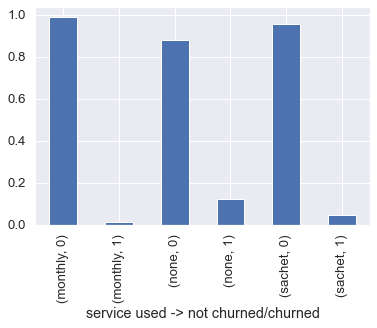

In [ ]:
(df[['service_used', 'churned']].groupby(['service_used', 'churned']).size()/df.groupby(['service_used']).size()).plot.bar()
plt.xlabel("service used -> not churned/churned")
plt.show()

***Here we can notice that 12.12% of the customers who do not use any package have churned.***

#### 3 - Average Revenue Per User
Customers who have not churned or churned based on Average Revenue

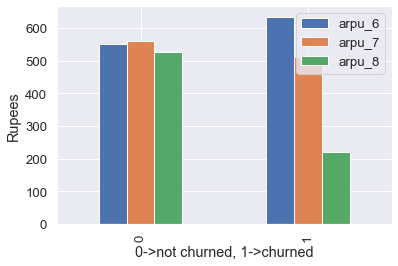

In [ ]:
df.groupby('churned')['arpu_6','arpu_7','arpu_8'].mean().plot.bar()
plt.xlabel('0->not churned, 1->churned')
plt.ylabel('Rupees')
plt.show()

***Here we can notice that there is a gradual decline in average revenue from 6th to 8th month.***

#### 4 - Total Outgoing & Incoming Minutes
Customers who have not churned or churned based on Total Outgoing Minutes

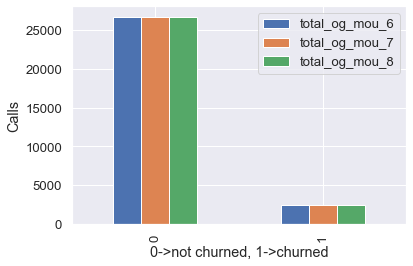

In [ ]:
df.groupby('churned')['total_og_mou_6','total_og_mou_7','total_og_mou_8'].count().plot.bar()
plt.xlabel('0->not churned, 1->churned')
plt.ylabel('Calls')
plt.show()

***Here we can notice that churned customers make very few incoming & outgoing calls calls compared to good customers.***

Customers who have not churned or churned based on Total Incoming Minutes.

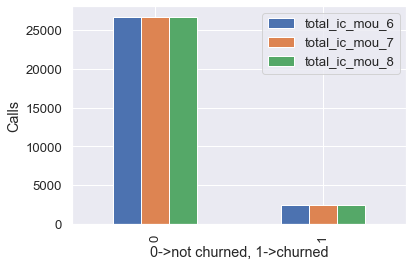

In [ ]:
df.groupby('churned')['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].count().plot.bar()
plt.xlabel('0->not churned, 1->churned')
plt.ylabel('Calls')
plt.show()

#### 5 - Average Total Recharge
Below total average recharge of users is plotted for 3 Months.

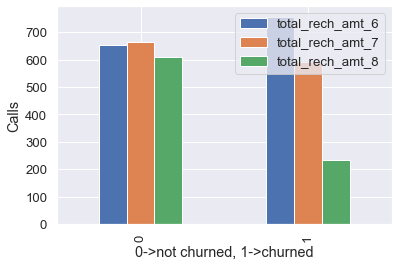

In [ ]:
df.groupby('churned')['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'].mean().plot.bar()
plt.xlabel('0->not churned, 1->churned')
plt.ylabel('Calls')
plt.show()

***Here we can notice that churned customers shows gradual decline in average reccharge from 6th to 8th month.***

## Step 3: Data Normalization & Class Imbalance Check

### Convert Categorical Variables to Dummy Variables

In [ ]:
categorical_vars = ['service_used','user_type']

for v in categorical_vars:
    #Impute nan as 0 for categoricals
     df[v].fillna('0',inplace=True)

for v in categorical_vars:
    #Add dummy
    cont = pd.get_dummies(df[v],prefix=v,drop_first=True)
    df = pd.concat([df,cont],axis=1)

In [ ]:
df = df.drop(categorical_vars,axis=1)
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1,night_pck_user_7_1,night_pck_user_8_1,fb_user_6_1,fb_user_7_1,fb_user_8_1,churned,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,avg_amt_6_7,usage_diff_og_mou,service_used_none,service_used_sachet,user_type_3g,user_type_both
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,1069.18000000,1349.85000000,3171.48000000,57.84000000,54.68000000,52.29000000,453.43000000,567.16000000,325.91000000,16.23000000,33.49000000,31.64000000,23.74000000,12.59000000,38.06000000,51.39000000,31.38000000,40.28000000,308.63000000,447.38000000,162.28000000,62.13000000,55.14000000,53.23000000,0.00000000,0.00000000,0.00000000,422.16000000,533.91000000,255.79000000,4.30000000,23.29000000,12.01000000,49.89000000,31.76000000,49.14000000,6.66000000,20.08000000,16.68000000,60.86000000,75.14000000,77.84000000,0.00000000,0.18000000,10.01000000,4.50000000,0.00000000,6.50000000,0.00000000,0.00000000,0.00000000,487.53000000,609.24000000,350.16000000,58.14000000,32.26000000,27.31000000,217.56000000,221.49000000,121.19000000,152.16000000,101.46000000,39.53000000,427.88000000,355.23000000,188.04000000,36.89000000,11.83000000,30.39000000,91.44000000,126.99000000,141.33000000,52.19000000,34.24000000,22.21000000,180.54000000,173.08000000,193.94000000,626.46000000,558.04000000,428.74000000,0.21000000,0.00000000,0.00000000,2.06000000,14.53000000,31.59000000,15.74000000,15.19000000,15.14000000,5.00000000,5.00000000,7.00000000,1580.00000000,790.00000000,3638.00000000,1580.00000000,790.00000000,1580.00000000,0.00000000,0.00000000,779.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,26.37290365,57.74000000,19.38000000,18.74000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1,15884.00000000,15912.00000000,

In [ ]:
#Taking data snapshot before Normalisation
df.to_pickle("./dummy_1.pkl")

### Normalise Data

In [ ]:
df = convert_to_numeric(df)

#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
df_others = df.select_dtypes(include=[np.datetime64,object])
df_floats = df.select_dtypes(exclude=[np.datetime64,object]).apply(normalize)

df = pd.concat([df_others, df_floats], axis=1)
print(df.shape)

df.head()

(29201, 149)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1,night_pck_user_7_1,night_pck_user_8_1,fb_user_6_1,fb_user_7_1,fb_user_8_1,churned,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,avg_amt_6_7,usage_diff_og_mou,service_used_none,service_used_sachet,user_type_3g,user_type_both
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,0.26161614,0.39403305,0.82935831,0.01388822,0.01374436,0.01322930,0.10858440,0.13214845,0.07888972,0.00911895,0.02139813,0.02010638,0.01260493,0.00842964,0.02344347,0.01569309,0.01012604,0.01455576,0.11887622,0.17024953,0.06961252,0.17489585,0.17389385,0.20652596,0.00000000,0.00000000,0.00000000,0.12689939,0.16788514,0.09217126,0.00105351,0.00594154,0.00315533,0.01231794,0.00784742,0.01211013,0.02641704,0.07781136,0.07729737,0.01410076,0.01753506,0.01918191,0.00000000,0.00064199,0.03240111,0.01329827,0.00000000,0.01593098,0.00000000,0.00000000,0.00000000,0.11026748,0.13908128,0.08429445,0.01757807,0.01076794,0.00948086,0.06655592,0.08506218,0.04660544,0.15017617,0.10082080,0.05166915,0.12762898,0.11278468,0.06287744,0.01841011,0.00861987,0.02085134,0.04806914,0.06357351,0.08572000,0.10058590,0.06612464,0.05240185,0.08857120,0.08642592,0.11222341,0.18183401,0.17370462,0.14076710,0.21000000,0.00000000,0.00000000,0.00158524,0.00940070,0.02248783,0.04572391,0.04310687,0.04379647,0.05154639,0.05882353,0.08536585,0.38035628,0.18579492,0.90950000,0.79000000,0.37619048,0.92995880,0.00000000,0.00000000,0.51933333,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.15484192,0.01348388,0.00426512,0.00422839,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.99981117,0.99962307,0.99968650,0.00000000,0.00000000,0.06022489,0.02571531,0.03409681,0.51145923,1.00000000,0.00000000,1.00000000,0.00000000
7001524

In [ ]:
#Taking data snapshot after Normalisation
df.to_pickle("./dummy_2.pkl")

### Checking Class Imbalance

In [ ]:
print((sum(df['churned'])/len(df['churned'].index))*100)

8.540803397143934


***From above we can notice that there is a class imbalance since churn rate is < 10%.***

### Hence we will use SMOTE Algorithm to resolve Class Imbalance

In [ ]:
unpickled_df = pd.read_pickle("./dummy_2.pkl")
df = unpickled_df
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Putting feature variable to X
df = df.reset_index()
X = df.drop(['churned','mobile_number'],axis=1)

# Putting response variable to y
y = df['churned']
y.head()

0   1.00000000
1   0.00000000
2   0.00000000
3   0.00000000
4   0.00000000
Name: churned, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After SMOTE, the shape of train_X: {}'.format(X_train_res.shape))
print('After SMOTE, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After SMOTE, counts of label '1': {}".format(sum(y_train_res==1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 1757
Before OverSampling, counts of label '0': 18683 

After SMOTE, the shape of train_X: (37366, 148)
After SMOTE, the shape of train_y: (37366,) 

After SMOTE, counts of label '1': 18683
After SMOTE, counts of label '0': 18683


In [ ]:
X.shape

(29201, 148)

In [ ]:
print(X_test.shape, y_test.shape, sum(y_test == 0))

(8761, 148) (8761,) 8024


In [ ]:
#Similarly SMOTE out test data 
X_test_res, y_test_res = sm.fit_resample(X_test, y_test)
print (X_test_res.shape, y_test_res.shape, sum(y_test_res == 0))

(16048, 148) (16048,) 8024


In [ ]:
X_train_res_df = pd.DataFrame(X_train_res,columns=X.columns)
y_train_res_df  = pd.DataFrame(y_train_res,columns=['churned'])
X_test_res_df = pd.DataFrame(X_test_res,columns=X.columns)
y_test_res_df = pd.DataFrame(y_test_res,columns=['churned'])

## Step 4: Model for Churn Prediction
***Here we will try various classification model and pick one for Churn Prediction***

### Optimal Variable Selection using PCA

In [ ]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [ ]:
#Doing the PCA on the train data
pca.fit(X_train_res)

PCA(random_state=42, svd_solver='randomized')

In [ ]:
pca.components_

array([[ 3.24459037e-03,  1.58835010e-02,  3.30489932e-02, ...,
         2.15331958e-01,  3.19739484e-02, -4.80238558e-01],
       [-5.10164027e-03,  2.20223488e-02,  4.48189522e-02, ...,
         4.55008245e-01, -9.36391039e-02, -2.48511032e-01],
       [ 9.26324999e-02,  1.51516468e-01,  1.29770540e-01, ...,
        -1.74590937e-01, -5.57879543e-02,  1.21910881e-01],
       ...,
       [ 0.00000000e+00, -9.68843759e-17,  1.67909346e-17, ...,
         1.04320877e-17,  3.24495606e-17,  4.03319280e-17],
       [-0.00000000e+00,  1.79440021e-16, -3.05604403e-17, ...,
         7.63218875e-18,  3.24610665e-17,  2.01191543e-17],
       [-0.00000000e+00,  4.78903127e-17, -2.32541923e-17, ...,
        -1.33062475e-17,  2.89928776e-17,  2.55874508e-17]])

In [ ]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,Feature
0,0.00324459,-0.00510164,arpu_6
1,0.01588350,0.02202235,arpu_7
2,0.03304899,0.04481895,arpu_8
3,-0.02124163,0.04716072,onnet_mou_6
4,-0.01524275,0.06237865,onnet_mou_7
5,-0.00149933,0.05265642,onnet_mou_8
6,-0.01591806,0.03635179,offnet_mou_6
7,-0.00799999,0.05610725,offnet_mou_7
8,0.00711937,0.05329276,offnet_mou_8
9,-0.00069276,0.00001116,roam_ic_mou_6


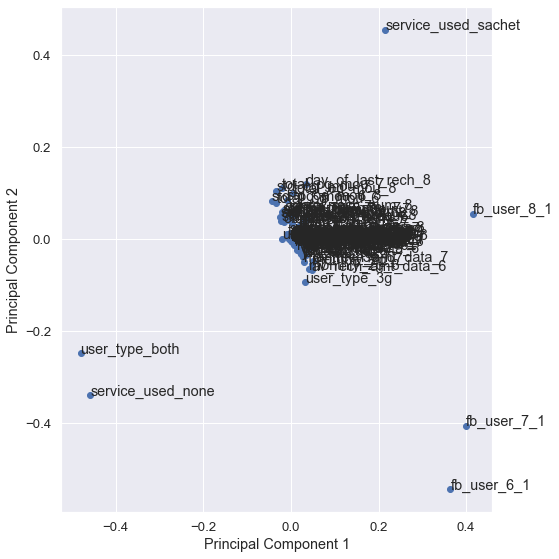

In [ ]:
#%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

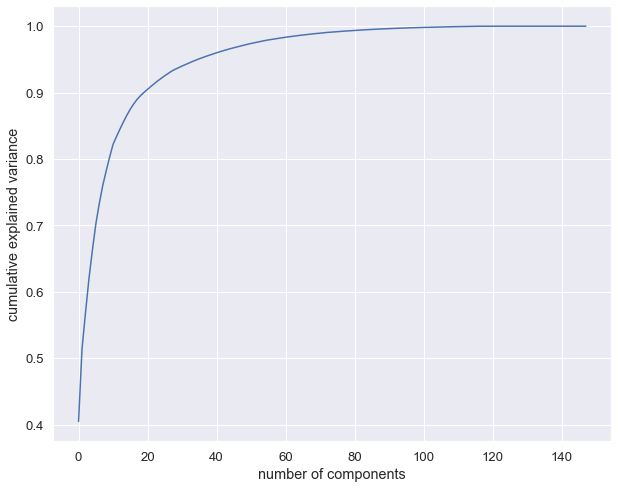

In [ ]:
#Making the screeplot - plotting the cumulative variance against the number of components
#%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

***Here we can notice that around 15 components are required to describe 85% of variance in the dataset.***
- Now we will choose 15 components for our modelling

In [ ]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=15)

In [ ]:
df_train_pca = pca_final.fit_transform(X_train_res)
df_train_pca.shape

(37366, 15)

In [ ]:
#Creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

<AxesSubplot:>

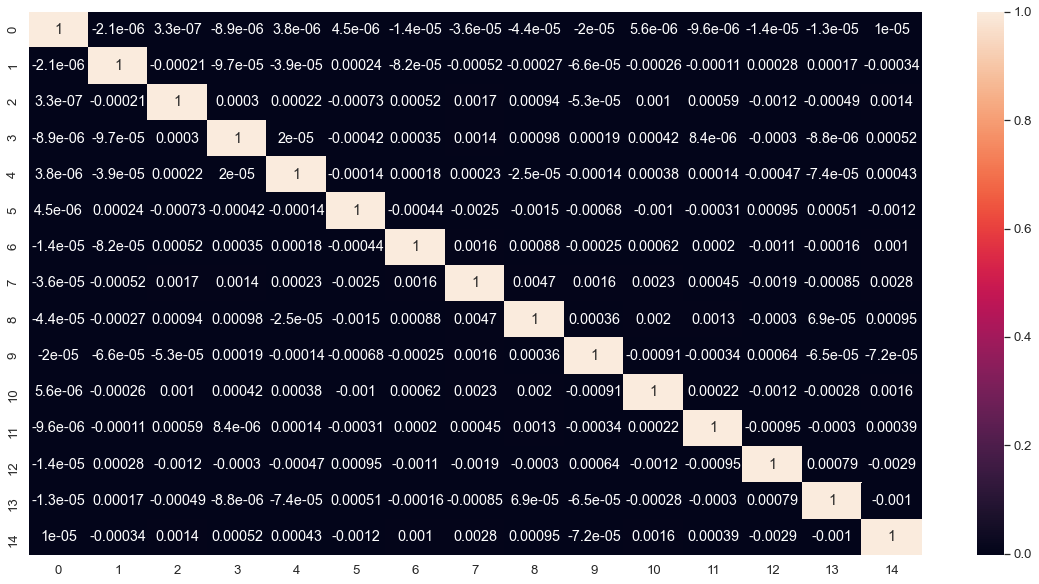

In [ ]:
#plotting the correlation matrix
#%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [ ]:
#1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0047306386832486275 , min corr:  -0.0028823874164119094


***Here we can notice that there is no correlation between any two components.***
- Hence we effectively have removed multicollinearity and our models will be much more stable

In [ ]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8761, 15)

### Model 1: Logistic Regression

In [ ]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train_res)

In [ ]:
pred_res = model_pca.predict_proba(pca_final.transform(X_test_res))[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test_res, pred_res))

'0.88'

In [ ]:
confusion = metrics.confusion_matrix(y_test_res,  pred_res.round())
confusion

array([[6420, 1604],
       [1467, 6557]], dtype=int64)

In [ ]:
#Accuracy
print("Accuracy", metrics.accuracy_score(y_test_res,  pred_res.round()))

#Precision
print("Precision", metrics.precision_score(y_test_res,  pred_res.round()))

#Recall/Sensitivity
print("Recall", metrics.recall_score(y_test_res,  pred_res.round()))

Accuracy 0.8086365902293121
Precision 0.8034554588898419
Recall 0.817173479561316


In [ ]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#Specificity (% of Non Churn correctly classified)
print("Specificity = {}%".format("{:2.4}".format(TN / float(TN+FP))))

#Sensitivity (% of Churn correctly classified)
print("Sensitivity = {}%".format("{:2.4}".format(TP / float(TP+FN))))

Specificity = 0.8035%
Sensitivity = 0.814%


***From above we can say that 81% of the churned customers are correctly classified using this model with 15 features.***

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

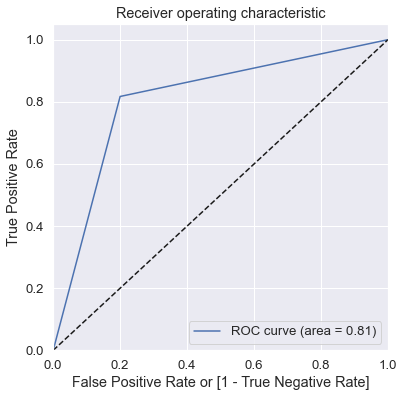

(array([0.       , 0.1999003, 1.       ]),
 array([0.        , 0.81717348, 1.        ]),
 array([2., 1., 0.]))

In [ ]:
draw_roc(y_test_res, pred_res.round())

### Model 2: SVM
- Since I am having Datascience background even though SVM is not part of UpGrad Module still I am using the same.

In [ ]:
X_train = df_train_pca
y_train = y_train_res
X_test = pca_final.transform(X_test_res)
y_test = y_test_res

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#To perform well on SVM the data should be balanced 
model = SVC(C=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
#Evaluate the model using confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion

array([[6935, 1089],
       [1688, 6336]], dtype=int64)

In [ ]:
#Accuracy
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

#Precision
print("Precision", metrics.precision_score(y_test, y_pred))

#Recall/Sensitivity
print("Recall", metrics.recall_score(y_test, y_pred))

Accuracy 0.826956630109671
Precision 0.8533333333333334
Recall 0.7896311066799602


In [ ]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#Specificity (% of Non Churn correctly classified)
print("Specificity = {}".format("{:2.4}".format(TN / float(TN+FP))))

#Sensitivity 
print("Sensitivity", TP / float(TP+FN))

Specificity = 0.8533
Sensitivity 0.8042444624840542


In [ ]:
#Creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

#Instantiating a model with cost=1
model = SVC(C = 1)

In [ ]:
#We have specified 'Accuracy' as the metric
cv_results = cross_val_score(model, X_train, y_train, cv = folds, scoring = 'accuracy')  

In [ ]:
#Print 5 Accuracys obtained from the 5 folds
print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))

[0.8300776  0.83353406 0.82791382 0.83621036 0.83580891]
mean accuracy = 0.8327089501511479


***Here we will stop since SVM requires too much computational power which is not possible with single machine.***

### Model 3: Random Forest

In [ ]:
X_train = df_train_pca
y_train = y_train_res
X_test = pca_final.transform(X_test_res)
y_test = y_test_res

In [ ]:
#Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

#Create the random forest object with default parameters.
rfc_default = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

In [ ]:
#Fit to the created object
rfc_default.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, n_jobs=-1)

In [ ]:
#Making predictions on test data
predictions = rfc_default.predict(X_test)

In [ ]:
#Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [ ]:
#Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.70      0.94      0.80      8024
         1.0       0.90      0.59      0.72      8024

    accuracy                           0.76     16048
   macro avg       0.80      0.76      0.76     16048
weighted avg       0.80      0.76      0.76     16048



In [ ]:
#Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7510  514]
 [3259 4765]]


In [ ]:
#Accuracy on testing data
print(accuracy_score(y_test,predictions))

0.7648928215353938


#### Tuning Max Depth Parameter
- Here we will check how the value of max_depth impact overall accuracy.

In [ ]:
#GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Specify number of folds for k-fold CV
n_folds = 5

#Parameters to build the model on
parameters = {'max_depth': range(5, 50, 10)}

#Instantiate the random forest model
rfc_maxdepth = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

#Fit tree on training data
rfc_maxdepth = GridSearchCV(rfc_maxdepth, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs = -1, return_train_score=True)
rfc_maxdepth.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1, param_grid={'max_depth': range(5, 50, 10)},
             return_train_score=True, scoring='accuracy')

In [ ]:
#Scores of GridSearch CV
scores = rfc_maxdepth.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.05095944,0.18531870,2.00389495,0.12460389,5,{'max_depth': 5},0.57492641,0.56362906,0.57072126,0.57634150,0.58423659,0.57397096,0.00677393,5,0.57597350,0.56916335,0.57658984,0.57622186,0.58404978,0.57639967,0.00471461
1,12.11840386,2.42436539,1.75346365,2.01980031,15,{'max_depth': 15},0.83275355,0.84236585,0.84102770,0.83567510,0.83554128,0.83747269,0.00362803,4,0.86742272,0.87097314,0.86963503,0.87037099,0.87114040,0.86990846,0.00135047
2,22.52716184,1.63325693,1.42082481,1.11378390,25,{'max_depth': 25},0.90594059,0.91569651,0.91516125,0.91502743,0.91864044,0.91409324,0.00428314,3,0.96942326,0.97089620,0.97123072,0.97186632,0.97169906,0.97102311,0.00087025
3,22.74024439,1.85158700,2.69949651,0.61313053,35,{'max_depth': 35},0.92333423,0.92988090,0.92934564,0.93309247,0.93175432,0.92948151,0.00335177,2,0.99819350,0.99829391,0.99859499,0.99832737,0.99879570,0.99844109,0.00022151
4,21.52558150,7.42037942,0.82210593,0.39046134,45,{'max_depth': 45},0.92507359,0.93215576,0.92921183,0.93376154,0.93402917,0.93084638,0.00335677,1,0.99996655,0.99996655,1.00000000,1.00000000,1.00000000,0.99998662,0.00001639


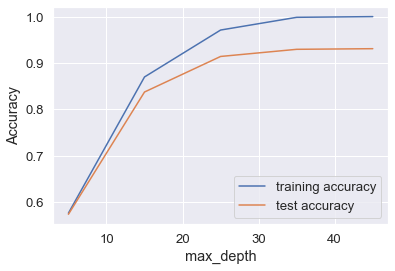

In [ ]:
#Plotting Accuracys with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***From above we can notice with max_depth of around 30-35 testing accuracy is gradually flattening.***

#### Tuning N_Estimators

In [ ]:
#GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Specify number of folds for k-fold CV
n_folds = 5

#Parameters to build the model on
parameters = {'n_estimators': range(30, 150, 30)}

#Instantiate the model with a max_depth
rf = RandomForestClassifier(max_depth = 22,class_weight={0:0.1, 1: 0.9}, n_jobs = -1)


#Fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs = -1, return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              max_depth=22, n_jobs=-1),
             n_jobs=-1, param_grid={'n_estimators': range(30, 150, 30)},
             return_train_score=True, scoring='accuracy')

In [ ]:
#Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.70528655,1.62659580,2.65640006,0.87811766,30,{'n_estimators': 30},0.88640621,0.90204737,0.90218119,0.90164593,0.90191356,0.89883885,0.00621884,4,0.94767831,0.94951995,0.95266450,0.95146021,0.95253069,0.95077073,0.00191242
1,9.89130487,0.85193698,1.95307994,1.56332527,60,{'n_estimators': 60},0.89108911,0.90485749,0.90271645,0.90137830,0.90311789,0.90063185,0.00489904,3,0.94911682,0.95289867,0.95253069,0.95222962,0.95146021,0.95164720,0.00135083
2,17.05964580,0.44737043,2.64279318,0.43146297,90,{'n_estimators': 90},0.89001873,0.90351934,0.90405460,0.90258263,0.90458986,0.90095303,0.00550721,2,0.94774522,0.95293212,0.95460476,0.95276486,0.95172783,0.95195496,0.00229808
3,16.55970030,1.56092540,1.36705723,1.12907271,120,{'n_estimators': 120},0.89296227,0.90418841,0.90552656,0.90177974,0.90285026,0.90146145,0.00443233,1,0.94948481,0.95232998,0.95423678,0.95330010,0.95038972,0.95194828,0.00177246


<Figure size 432x288 with 0 Axes>

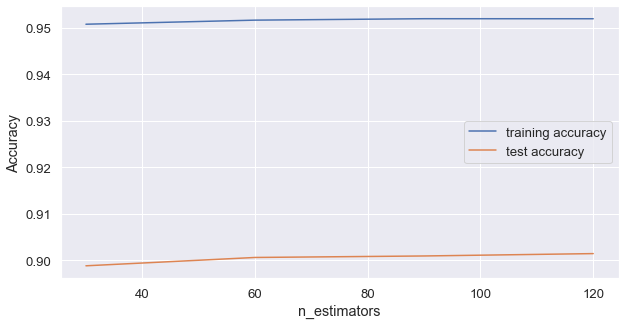

In [ ]:
#Plotting accuracies with n_estimators
plt.figure()
plt.figure(figsize=(10,5))
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***Here we can notice that th Test Accuracy seems to be flattened beyond n_estimator = 60. Although 60 gives almost 90% accuracy.***

#### Tuning Max_Features

In [ ]:
#GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Specify number of folds for k-fold CV
n_folds = 5

#Parameters to build the model on
parameters = {'max_features': [2,4,8,10]}

#Instantiate the model
rf = RandomForestClassifier(max_depth=22,class_weight={0:0.1, 1: 0.9}, n_jobs = -1)


#Fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs = -1, return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              max_depth=22, n_jobs=-1),
             n_jobs=-1, param_grid={'max_features': [2, 4, 8, 10]},
             return_train_score=True, scoring='accuracy')

In [ ]:
#Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,16.14393167,1.18363192,2.82060766,0.22913414,2,{'max_features': 2},0.89296227,0.90499130,0.90271645,0.90017396,0.90418841,0.90100648,0.00434350,2,0.95266292,0.95574215,0.95510655,0.95644465,0.95594286,0.95517983,0.00132954
1,24.44564056,1.54945010,3.32798324,1.00006886,4,{'max_features': 4},0.89149050,0.90485749,0.90445604,0.90070922,0.90365315,0.90103328,0.00498745,1,0.94747759,0.95022246,0.95125949,0.94978758,0.94885090,0.94951960,0.00128141
2,53.78068843,1.40895676,3.55104637,0.76451516,8,{'max_features': 8},0.88921595,0.89602569,0.89723003,0.89482136,0.89602569,0.89466374,0.00282839,3,0.93931487,0.93995250,0.94239454,0.94122370,0.94149132,0.94087538,0.00110413
3,48.23119974,11.34696576,1.18182845,1.02520072,10,{'max_features': 10},0.88212470,0.89348321,0.89602569,0.89241269,0.89294795,0.89139885,0.00479978,4,0.93613676,0.93640652,0.93924999,0.93797879,0.93858094,0.93767060,0.00121398


<Figure size 432x288 with 0 Axes>

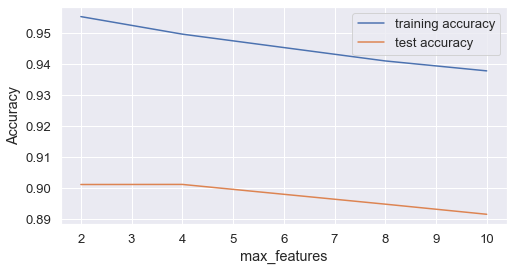

In [ ]:
#Plotting accuracies with max_features
plt.figure()
plt.figure(figsize=(8,4))
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***Here we can notice that the Test Accuracy drops after max_features = 4.***

#### Tuning Min_Sample_Leaf

In [ ]:
#GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Specify number of folds for k-fold CV
n_folds = 5

#Parameters to build the model on
parameters = {'min_samples_leaf': range(50, 500, 100)}

#Instantiate the model
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)


#Fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs = -1, return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1, param_grid={'min_samples_leaf': range(50, 500, 100)},
             return_train_score=True, scoring='accuracy')

In [ ]:
#Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,14.54162426,0.88289579,1.00059643,0.47551252,50,{'min_samples_leaf': 50},0.69066096,0.69677506,0.69035193,0.69864847,0.69597217,0.69448172,0.00336143,1,0.70533922,0.70237179,0.70407788,0.70457967,0.70407788,0.70408929,0.00097497
1,13.16483350,2.28470631,1.15441623,0.91523886,150,{'min_samples_leaf': 150},0.61198823,0.61354208,0.60564700,0.61153486,0.62130336,0.61280310,0.00502559,2,0.61514787,0.61412371,0.61593015,0.61014284,0.62258723,0.61558636,0.00402725
2,10.91302695,1.91434479,1.27811556,1.26011958,250,{'min_samples_leaf': 250},0.58603158,0.58329988,0.58102502,0.58048976,0.59025826,0.58422090,0.00359754,3,0.58851867,0.58445121,0.58609039,0.58194226,0.58863279,0.58592706,0.00253459
3,9.74726005,0.63414217,0.89453182,0.67371420,350,{'min_samples_leaf': 350},0.57118009,0.57072126,0.56362906,0.56938311,0.57553861,0.57009043,0.00383451,4,0.57162451,0.57150503,0.56909644,0.57060181,0.57354565,0.57127469,0.00145122
4,7.80107818,2.74920622,0.37571254,0.25661743,450,{'min_samples_leaf': 450},0.54816698,0.55279004,0.54328917,0.55841028,0.55452964,0.55143722,0.00523645,5,0.55044828,0.55447764,0.54514435,0.56013113,0.55327334,0.55269495,0.00491667


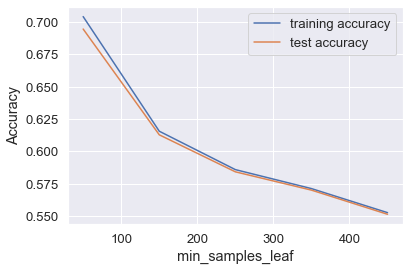

In [ ]:
#Plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***Here we can notice that Min_Samples_Leaf shows a steady convergence after 50 - 100 onwards.***

#### Tuning Min_Sample_Split

In [ ]:
#GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Specify number of folds for k-fold CV
n_folds = 5

#Parameters to build the model on
parameters = {'min_samples_split': range(100, 1000, 100)}

#Instantiate the model
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)


#Fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",n_jobs = -1, return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1, param_grid={'min_samples_split': range(100, 1000, 100)},
             return_train_score=True, scoring='accuracy')

In [ ]:
#Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,22.34096584,1.02903498,1.53021040,0.53756312,100,{'min_samples_split': 100},0.78378378,0.78669878,0.78415630,0.78469156,0.78081092,0.78402827,0.00189732,1,0.81222401,0.80804871,0.80527214,0.80410129,0.80567357,0.80706394,0.00288156
1,21.44944944,2.17260657,1.23335547,0.83160493,200,{'min_samples_split': 200},0.71099813,0.71015656,0.70707882,0.71095945,0.71350194,0.71053898,0.00206328,2,0.73407601,0.72140635,0.72401566,0.72247683,0.72565484,0.72552594,0.00450931
2,19.95344119,0.99671859,1.05938549,0.60540177,300,{'min_samples_split': 300},0.67273214,0.67054730,0.66104643,0.67135019,0.67094875,0.66932496,0.00420417,3,0.68714037,0.67728231,0.67701469,0.67417121,0.67959054,0.67903982,0.00440035
3,18.23457904,0.94906955,1.63701153,0.74345403,400,{'min_samples_split': 400},0.64035322,0.64311521,0.63548776,0.64753111,0.64097417,0.64149230,0.00391718,4,0.65141175,0.64811160,0.64674004,0.64700766,0.64279263,0.64721273,0.00276559
4,17.04963746,1.79331402,1.67507396,1.02616084,500,{'min_samples_split': 500},0.62523415,0.62277532,0.62063428,0.62531781,0.62424729,0.62364177,0.00176109,5,0.63020206,0.62492891,0.63101730,0.62650119,0.62693607,0.62791711,0.00231209


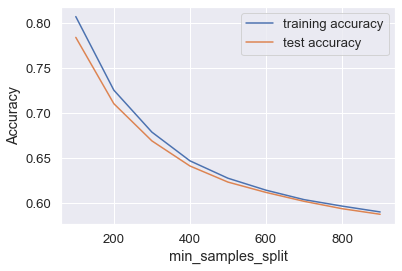

In [ ]:
#Plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***Here we can notice that Min_Sample_Split shows steady convergence after 200 - 300.***

### Grid Search to Find Optimal Hyperparameter

In [ ]:
#Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [25,30,35, 40],
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(100, 400, 100),
    'n_estimators': [30,60,90], 
    'max_features': [3,4,5]
}
#Create a based model
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)
#Instantiate the grid search model, Uncomment it to test it
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1)

In [ ]:
#Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 38.2min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [25, 30, 35, 40],
                         'max_features': [3, 4, 5],
                         'min_samples_leaf': range(50, 200, 50),
                         'min_samples_split': range(100, 400, 100),
                         'n_estimators': [30, 60, 90]},
             verbose=1)

***Here the above GridSearchCV takes long time to run hence log is added above.***
- In future we will not run above since it almost takes 1 Hour 30 Mins to execute.

In [ ]:
#Printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.7119306212739602 using {'max_depth': 35, 'max_features': 5, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 60}


***From above we can get accuracy of 0.7131082583233097 using 'max_depth': 40, 'max_features': 5, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 30.***

### Now we will Fit the Final Model with best parameters obtained from Grid Search

In [ ]:
#Model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=30,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=5,
                             n_estimators=100)

In [ ]:
#Fit
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, max_features=5, min_samples_leaf=50,
                       min_samples_split=100)

In [ ]:
#Predict
predictions = rfc.predict(X_test)

In [ ]:
#Evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82      8024
         1.0       0.85      0.76      0.80      8024

    accuracy                           0.81     16048
   macro avg       0.82      0.81      0.81     16048
weighted avg       0.82      0.81      0.81     16048



In [ ]:
confusion = confusion_matrix(y_test,predictions)
print (confusion)

TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[6988 1036]
 [1954 6070]]


In [ ]:
print(accuracy_score(y_test,predictions))

0.8136839481555334


In [ ]:
#Specificity (% of Non Churn correctly classified)
print("Specificity = {}".format("{:2.4}".format(TN / float(TN+FP))))

#Sensitivity 
print("Sensitivity", TP / float(TP+FN))

Specificity = 0.8542
Sensitivity 0.781480653097741


### Model 4: Decision Tree
- Here we will work on normalised original features(not PCAs).

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
#Read the normalised data 
unpickled_df = pd.read_pickle("./dummy_2.pkl")
df_var = unpickled_df

X = df_var.drop(['churned'],axis=1)

#Putting response variable to y
y = df_var['churned']

#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1,night_pck_user_7_1,night_pck_user_8_1,fb_user_6_1,fb_user_7_1,fb_user_8_1,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,avg_amt_6_7,usage_diff_og_mou,service_used_none,service_used_sachet,user_type_3g,user_type_both
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7001186304,0.05987366,0.19363656,0.05467154,0.03521519,0.03745513,0.02577044,0.09644310,0.06452477,0.05823718,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.04427595,0.03971035,0.03680857,0.15490153,0.09977205,0.09915108,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.16447382,0.12113665,0.11999668,0.00040671,0.00662013,0.00000000,0.00013827,0.00364203,0.00232887,0.00000000,0.00000000,0.00000000,0.00051667,0.00949563,0.00232874,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.12425871,0.09723636,0.08244082,0.05137671,0.04666664,0.05893339,0.20188569,0.13625156,0.13027527,0.00783648,0.01180516,0.01131937,0.24990380,0.16080619,0.17293970,0.00114283,0.00909349,0.00000000,0.02242596,0.03551386,0.02404260,0.00000000,0.00000000,0.00141563,0.02205695,0.04166001,0.02328488,0.25623253,0.18362500,0.18302285,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.01030928,0.03529412,0.01219512,0.06716418,0.18273754,0.00000000,0.13950000,0.15476190,0.00000000,0.17942122,0.19163987,0.00000000,0.00000000,0.03448276,0.00000000,0.07271010,0.00000000,0.00645321,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.33333333,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.60816530,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.99924467,0.99993718,0.99956110,0.00000000,0.00546177,0.01063465,0.03030500,0.01000893,0.50414199,1.00000000,0.00000000,0.00000000,1.00000000
7000825294,0.17935034,0.210

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#First the defaults
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Making predictions
y_pred_dca = dt_default.predict(X_test)

#Printing classification report
print(classification_report(y_test, y_pred_dca))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      8034
         1.0       0.49      0.55      0.52       727

    accuracy                           0.92      8761
   macro avg       0.72      0.75      0.74      8761
weighted avg       0.92      0.92      0.92      8761



In [ ]:
#Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_dca))
print('Accuracy = ',accuracy_score(y_test,y_pred_dca))

[[7619  415]
 [ 327  400]]
Accuracy =  0.9153064718639424


### Plotting the Decision Tree

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
#Importing required packages for visualization
from IPython.display import Image 
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

#Putting features
features = list(df_var.columns[1:])

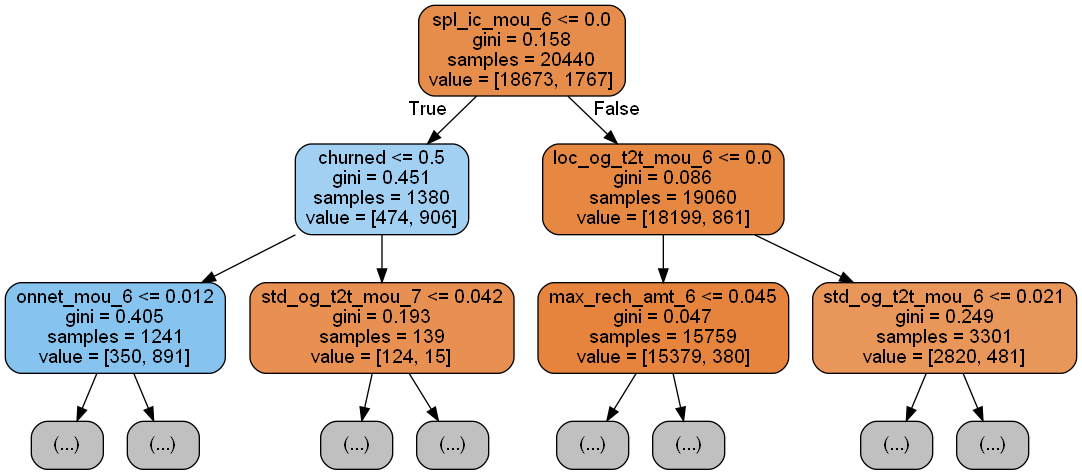

In [ ]:
# plotting tree with max_depth=2
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True, max_depth=2)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Tuning Max_Depth Parameter

In [ ]:
#GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#Specify number of folds for k-fold CV
n_folds = 5

#Parameters to build the model on
parameters = {'max_depth': range(1, 20, 4)}

#Instantiate the random forest model
dtc_depth = DecisionTreeClassifier(criterion = "gini")


#Fit tree on training data
tree = GridSearchCV(dtc_depth, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 20, 4)}, return_train_score=True,
             scoring='accuracy')

In [ ]:
scores = tree.cv_results_
print (tree.best_estimator_)

DecisionTreeClassifier(max_depth=5)


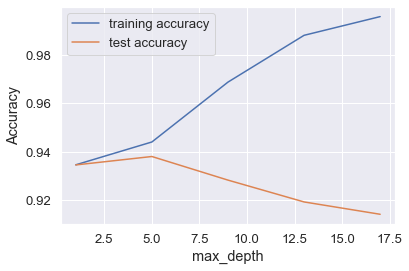

In [ ]:
#Plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***Here we can notice that after max_depth = 5 the Testing Accuracy is gradually flattening.***

#### Tuning Max_Features

In [ ]:
n_folds = 5

#Parameters to build the model on
parameters = {'max_features': [2,4,8,16]}

#Instantiate the model
tree = DecisionTreeClassifier(criterion = "gini",max_depth = 20)


#Fit tree on training data
tree = GridSearchCV(tree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=20),
             param_grid={'max_features': [2, 4, 8, 16]},
             return_train_score=True, scoring='accuracy')

In [ ]:
scores = tree.cv_results_
print (tree.best_estimator_)

DecisionTreeClassifier(max_depth=20, max_features=16)


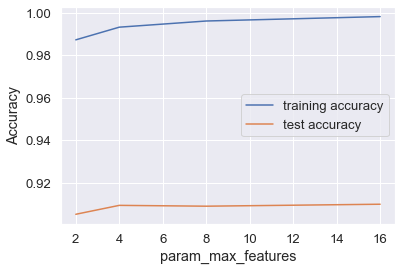

In [ ]:
#Plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("param_max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning Min_Samples_Leaf

In [ ]:
n_folds = 5

#Parameters to build the model on
parameters = {'min_samples_leaf': range(50, 300, 50)}

#Instantiate the model
tree = DecisionTreeClassifier(criterion = "gini")

#Fit tree on training data
tree = GridSearchCV(tree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)
scores = tree.cv_results_

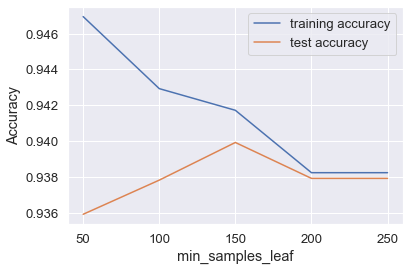

In [ ]:
#Plotting accuracies with min_sample_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***Here we can notice that at value > 150 the model become more stable and training & test accuracy starts to converge.***

#### Tuning Min_Samples_Split

In [ ]:
n_folds = 5

#Parameters to build the model on
parameters = {'min_samples_split': range(50, 300, 50)}

#Instantiate the model
tree = DecisionTreeClassifier(criterion = "gini")

#Fit tree on training data
tree = GridSearchCV(tree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)
scores = tree.cv_results_

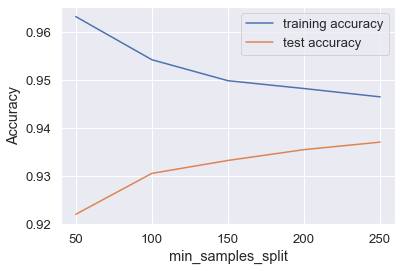

In [ ]:
#Plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***Here we can notice that at value > 150 the model become more stable and training & test accuracy starts to converge.***

### Grid Search to Find Optimal Hyperparameter

In [ ]:
#Create the parameter grid 
param_grid = {
    'max_depth': range(4, 8, 2),
    'max_features': [4,6],
    'min_samples_leaf': range(100, 250, 50),
    'min_samples_split': range(100, 300, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

#Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, n_jobs = 1)

In [ ]:
#Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   26.9s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(4, 8, 2), 'max_features': [4, 6],
                         'min_samples_leaf': range(100, 250, 50),
                         'min_samples_split': range(100, 300, 50)},
             verbose=1)

In [ ]:
#Printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)


#Printing the optimal accuracy score and hyperparameters
print('Using',grid_search.best_params_)

Best Accuracy 0.9356164383561645
DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=4,
                       min_samples_leaf=100, min_samples_split=100)
Using {'criterion': 'entropy', 'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [ ]:
#Model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  max_depth=6, 
                                  min_samples_leaf=150,
                                  min_samples_split=150,
                                 max_features = 6)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=6,
                       min_samples_leaf=150, min_samples_split=150)

In [ ]:
#Evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
#Predict
predictions = clf_gini.predict(X_test)
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      8034
         1.0       0.72      0.33      0.45       727

    accuracy                           0.93      8761
   macro avg       0.83      0.66      0.71      8761
weighted avg       0.92      0.93      0.92      8761



In [ ]:
confusion = confusion_matrix(y_test,predictions)
print (confusion)

TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[7940   94]
 [ 487  240]]


In [ ]:
print('Accuracy', accuracy_score(y_test,predictions))

#Specificity (% of Non Churn correctly classified)
print("Specificity = {}".format("{:2.4}".format(TN / float(TN+FP))))

#Sensitivity 
print("Sensitivity", TP / float(TP+FN))

Accuracy 0.93368336947837
Specificity = 0.7186
Sensitivity 0.9422095644950753


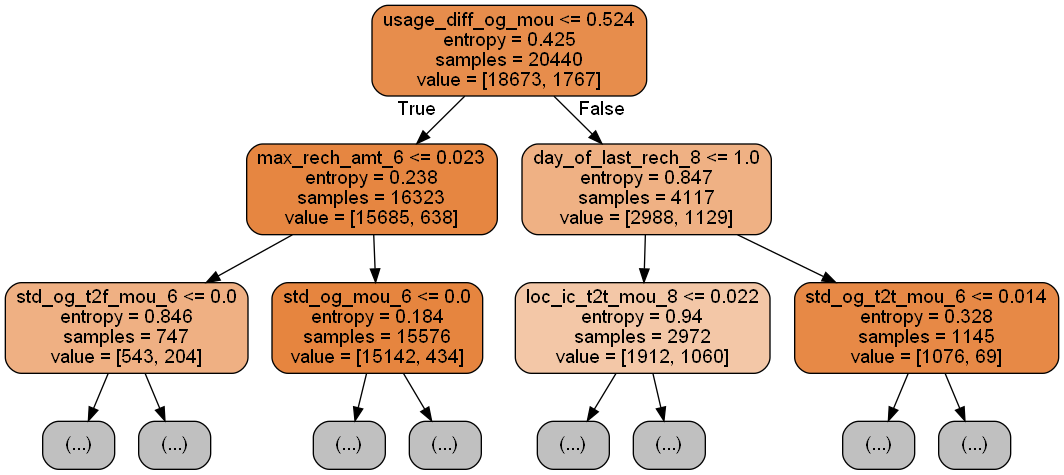

In [ ]:
#Plotting the final tree 
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,
                feature_names=features, filled=True,rounded=True, max_depth=2)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

***Here we can notice that it gives good Accuracy of 93% & Sensitivity of 95%.***

## Let's Check which is the final model which we will consider for Churn Prediction.
- As discussed earlier for Churn problem we need a model with high Sensitivity(and Good Accuracy)

<h2>Model & Performance Summary</h2>

<table style="width:100%" id="t01" >
  <tr>
    <th><font size="5" color="green">Model</th>
    <th><font size="5" color="green">Accuracy</th>
    <th><font size="5" color="green">Sensitivity</th>
    <th><font size="5" color="green">Specificity</th>
  </tr>
  <tr>
    <td><font size="4" color="brown">Decision Tree</td>
    <td><font size="4" color="brown">93%</td>
    <td><font size="4" color="brown">95%</td>
    <td><font size="4">63%</td>
  </tr>
  <tr>
    <td><font size="4">Logistic Regression</td>
    <td><font size="4">80%</td>
    <td><font size="4">81%</td>
    <td><font size="4">80%</td>
  </tr>
    <tr>
    <td><font size="4">Random Forest</td>
    <td><font size="4">81%</td>
    <td><font size="4">78%</td>
    <td><font size="4">85%</td>
  </tr>
</table>

<p>>Decision Tree has a best Sensitivity (with Accuracy).</p>
<p>>We recommend this model for Churn Prediction since it very accurately predicts the churners.</p>
<p>>Using PCA - Logistic Regression seems to be better than Random Forest with higher Sensitivity. Out of above 3 models, Logistic Regression is least computational demanding. Therefore if speed is required and PCA is must than one can go with Logistic Regression Model.</p>

## Step 5: Identifying Strong Churn Predictors

### 1: Decision Tree for Predictor Variables
- Here we will use the optimised decision tree from previous sections.

,Entropy-importance
roam_og_mou_8,0.07093151
loc_og_t2t_mou_8,0.03090584
loc_og_t2t_mou_7,0.00076032
arpu_8,0.00063630
arpu_6,0.00000000
roam_ic_mou_8,0.00000000
loc_og_t2m_mou_6,0.00000000


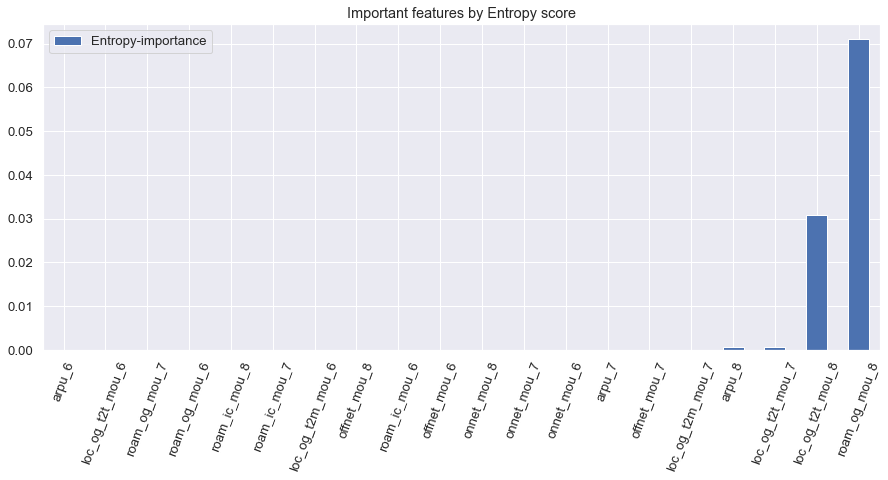

In [ ]:
import pandas as pd

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train[:20], clf_gini.feature_importances_[:20]):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Entropy-importance'})
importances.sort_values(by='Entropy-importance').plot(kind='bar', rot=70,figsize=(15,6), title ='Important features by Entropy score' )
importances.sort_values(by='Entropy-importance', ascending=False)[:7]

***Here with tuned Decision Tree, we get important features by Entropy Scores as--***
- loc_og_t2t_mou_8
- offnet_mou_7
- loc_og_t2m_mou_6 	
- offnet_mou_6
- roam_og_mou_8
- onnet_mou_7

### 2: Important Features of RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
rfe = RFE(SVR(kernel='linear'), 10, step=1)             
rfe = rfe.fit(X_train,y_train)

,feature,ranking,support
23,loc_og_t2f_mou_8,1,True
137,day_of_last_rech_8,1,True
44,isd_og_mou_8,1,True
128,sep_vbc_3g,1,True
49,og_others_7,1,True
50,og_others_8,1,True
59,loc_ic_t2m_mou_8,1,True
80,total_ic_mou_8,1,True
74,std_ic_t2f_mou_8,1,True
65,loc_ic_mou_8,1,True


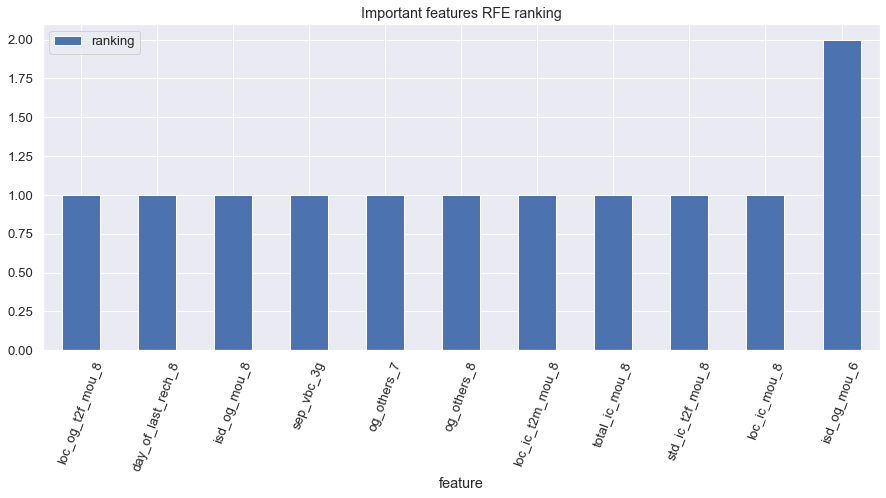

In [ ]:
#Plot the top ranking features 
importances = pd.DataFrame({'feature': X_train.columns, 'ranking': rfe.ranking_, 'support':rfe.support_})
importances.sort_values(by='ranking', ascending=True)[:11].plot(kind='bar', rot=70,figsize=(15,6), x='feature', title ='Important features RFE ranking' )
importances.sort_values(by='ranking', ascending=True)[:10]

***Here with RFE, we get Top features(All equal importance of Rank = 1--***
- loc_og_t2f_mou_8
- day_of_last_rech_8
- isd_og_mou_8
- og_others_7
- og_others_8
- total_ic_mou_8

### 3: Important Features using LASSO Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

#Read the normalised data 
unpickled_df = pd.read_pickle("./dummy_1.pkl")
df_var = unpickled_df
X = df_var.drop(['churned'],axis=1)

#Putting response variable to y
y = df_var['churned']

#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
lasso = Lasso()

#List of alphas to tune
params = {'alpha': [ 0.009, 0.005, 0.001, 0.05, 0.01, 0.1, 1.0, 50.0, 100.0]}

#Cross Validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=2)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  45 out of  45 | elapsed:  4.3min finished


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=2,
             param_grid={'alpha': [0.009, 0.005, 0.001, 0.05, 0.01, 0.1, 1.0,
                                   50.0, 100.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['mean_train_score','mean_test_score','param_alpha' ]].head(40)

,mean_train_score,mean_test_score,param_alpha
0,-0.14888320,-0.14971243,0.00900000
1,-0.14889806,-0.14979601,0.00500000
2,-0.14872293,-0.14973530,0.00100000
3,-0.14884147,-0.14942010,0.05000000
4,-0.14887896,-0.14969369,0.01000000
5,-0.14873646,-0.14923965,0.10000000
6,-0.14856044,-0.14880751,1.00000000
7,-0.15260250,-0.15262020,50.00000000
8,-0.15518220,-0.15519972,100.00000000


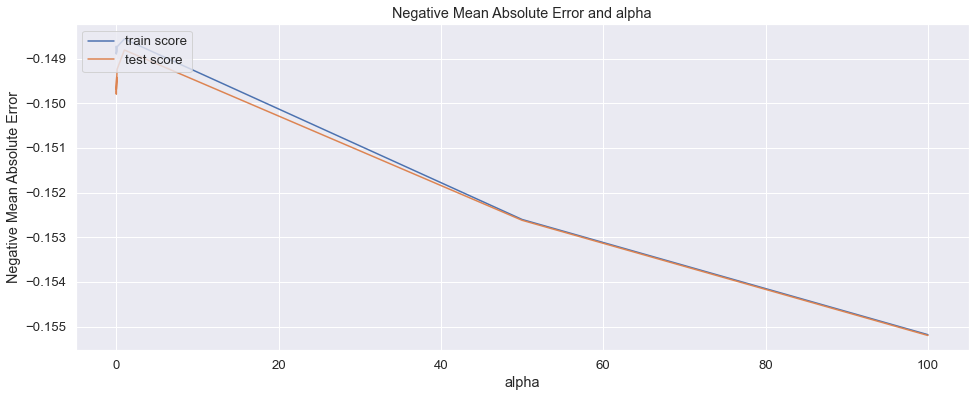

In [ ]:
#Plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

#Plotting
plt.figure(figsize=(16,6))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')

plt.show()

In [ ]:
print(model_cv.best_score_)

-0.14880751292234617


In [ ]:
print(model_cv.best_estimator_)

Lasso()


#### Best alpha = 1.0 as per Algo

In [ ]:
lasso = Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, 
              normalize=False, positive=False, precompute=False, random_state=None, selection='cyclic', 
              tol=0.0001, warm_start=False)
        
lasso.fit(X_train, y_train) 

Lasso()

In [ ]:
#Evaluate Model accuracy and effectiveness
y_pred_lasso = lasso.predict(X_test)

y_pred_lasso = pd.DataFrame(data=y_pred_lasso, columns=['val'])
#Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_lasso['predicted'] = y_pred_lasso['val'].apply( lambda x: 1 if abs(x) > 0.5 else 0)
#Let's see the head
y_pred_lasso.groupby('predicted').count()


#Printing classification report
print(classification_report(y_test, y_pred_lasso['predicted']))
print(' accuracy = ',accuracy_score(y_test,y_pred_lasso['predicted']))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8013
           1       0.79      0.08      0.15       748

    accuracy                           0.92      8761
   macro avg       0.86      0.54      0.55      8761
weighted avg       0.91      0.92      0.89      8761

 accuracy =  0.9197580184910399


,feature,score
13,roam_og_mou_7,0.00013089
143,usage_diff_og_mou,0.00009832
12,roam_og_mou_6,0.00004704
78,total_ic_mou_6,0.00003500
0,arpu_6,0.00002841
1,arpu_7,0.00002694
93,total_rech_amt_6,0.00002029
14,roam_og_mou_8,0.00002028
39,std_og_mou_6,0.00001420
33,std_og_t2m_mou_6,0.00000327


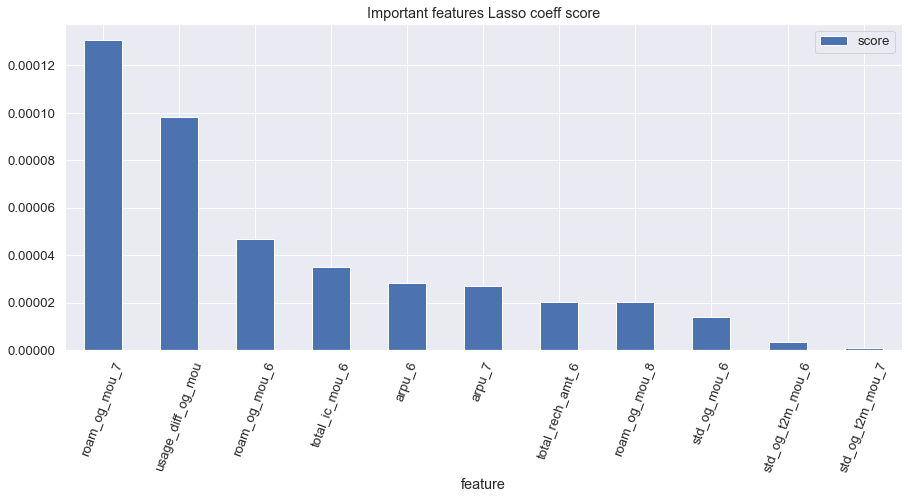

In [ ]:
# Plot the top ranking features 
importances = pd.DataFrame({'feature': X_train.columns, 'score': lasso.coef_})
importances = importances[importances.score != 0.0]
importances.sort_values(by='score', ascending=False)[:11].plot(kind='bar', rot=70,figsize=(15,6), x='feature',
                                                               title ='Important features Lasso coeff score' )
importances.sort_values(by='score', ascending=False)[:10]

***Here with LASSO Regression, we get below important features--***
- roam_og_mou_7
- usage_diff_og_mou
- arpu_7
- total_ic_mou_6
- total_rech_amt_6
- roam_og_mou_6

### 4: Important Features by Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

#Logistic regression model
logm1 = sm.GLM(y_train_res_df,(sm.add_constant(X_train_res_df)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                37366
Model:                            GLM   Df Residuals:                    37223
Model Family:                Binomial   Df Model:                          142
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13503.
Date:                Tue, 01 Mar 2022   Deviance:                       27005.
Time:                        16:53:49   Pearson chi2:                 6.80e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.021e+04   2564.366     -7.883      0.000   -2.52e+04   -1.52e+04
arpu_6                  0.1225      0.899      0.136      0.892      -1.640       1.885
arpu_7                  3.1777      0.852      3.729      0.000       1.507       4.848
arpu_8                  5.9226      0.904      6.549      0.000       4.150       7.695
onnet_mou_6           -22.8225     19.360     -1.179      0.238     -60.768      15.123
onnet_mou_7           -20.3566     14.007     -1.453      0.146     -47.809       7.096
onnet_mou_8           -37.7526     14.841     -2.544      0.011     -66.840      -8.665
offnet_mou_6          -17.0387     19.281     -0.884      0.377     -54.828      20.751
offnet_mou_7          -17.8835     14.738     -1.213      0.225     -46.769      11.002
offnet_mou_8          -60.0263     15.203     -3.948      0.000     -89.823     -30.229
roam_ic_mou_6           2.2759      0.710      3.205      0.001       0.884       3.668
roam_ic_mou_7          -0.1575      0.740     -0.213      0.831      -1.608       1.293
roam_ic_mou_8           0.6200      0.723      0.858      0.391      -0.796       2.036
roam_og_mou_6           8.6252      8.741      0.987      0.324      -8.507      25.757
roam_og_mou_7           6.9481      5.175      1.343      0.179      -3.195      17.091
roam_og_mou_8          21.2390      6.019      3.529      0.000       9.443      33.035
loc_og_t2t_mou_6     9162.3360   1.01e+04      0.907      0.365   -1.06e+04     2.9e+04
loc_og_t2t_mou_7    -1.426e+04   9491.144     -1.502      0.133   -3.29e+04    4344.601
loc_og_t2t_mou_8     8.332e+04   8922.213      9.339      0.000    6.58e+04    1.01e+05
loc_og_t2m_mou_6     7258.1378   8012.678      0.906      0.365   -8446.423     2.3e+04
loc_og_t2m_mou_7     -1.21e+04   8048.192     -1.503      0.133   -2.79e+04    3678.172
loc_og_t2m_mou_8      7.02e+04   7516.183      9.340      0.000    5.55e+04    8.49e+04
loc_og_t2f_mou_6      996.3610   1096.455      0.909      0.364   -1152.652    3145.374
loc_og_t2f_mou_7    -1462.5437    971.204     -1.506      0.132   -3366.069     440.982
loc_og_t2f_mou_8     7762.9314    831.063      9.341      0.000    6134.079    9391.784
loc_og_t2c_mou_6       -4.5425      0.730     -6.224      0.000      -5.973      -3.112
loc_og_t2c_mou_7        0.3415      0.882      0.387      0.699      -1.388       2.071
loc_og_t2c_mou_8        2.3149      0.768      3.013      0.003       0.809       3.821
loc_og_mou_6        -2.489e+04   1.27e+04     -1.960      0.050   -4.98e+04       0.625
loc_og_mou_7         4898.9816   1.27e+04      0.387      0.699   -1.99e+04    2.97e+04
loc_og_mou_8        -1.058e+04   1.18e+04     -0.899      0.369   -3.37e+04    1.25e+04
std_og_t2t_mou_6     3.511e+04   1.49e+04      2.355      0.019    5887.215    6.43e+04
std

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
#model = LogisticRegression(solver='liblinear')

logreg = LogisticRegression(solver='liblinear')

#Running RFE with 12 variables as output
rfe = RFE(logreg, 12)             
rfe = rfe.fit(X_train_res_df,y_train_res_df)

#Printing the boolean results
print(rfe.support_)           
print(rfe.ranking_)

[False False False False False False False False False  True False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True  True
 False False False False False  True False False False False False False
 False False False False False False False False  True False False  True
 False False False False False False False False  True False False False
 False False False False False  True False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False  True
 False False False False]
[ 53   8  68 113  76 120 111 128  30   1  98  52 112  57  12  54  11  29
  48  65   1  26  25  94 

In [ ]:
#X_train_res_df = X_train_res.to_frame
X_train_res_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1,night_pck_user_7_1,night_pck_user_8_1,fb_user_6_1,fb_user_7_1,fb_user_8_1,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8,total_data_rech_6,total_data_rech_7,total_amt_6,total_amt_7,avg_amt_6_7,usage_diff_og_mou,service_used_none,service_used_sachet,user_type_3g,user_type_both
0,0.12490691,0.23039747,0.25569088,0.00103489,0.15999306,0.22019992,0.00274915,0.16141329,0.15308106,0.00959653,0.00000000,0.00000000,0.00867054,0.00000000,0.00000000,0.00000000,0.00149406,0.00255123,0.00000000,0.00415178,0.01438321,0.00000000,0.02131887,0.02227051,0.03652021,0.05705651,0.03388136,0.00000000,0.00701526,0.01669814,0.00000000,0.16119963,0.22680794,0.00000000,0.16371606,0.14466849,0.00000000,0.00000000,0.00000000,0.00000000,0.30208652,0.35740108,0.00000000,0.00003567,0.00000000,0.00000000,0.03077835,0.02183770,0.00000000,0.00000000,0.00000000,0.00000000,0.30345671,0.36244256,0.00000000,0.00075436,0.00573851,0.00000000,0.00681296,0.01845143,0.00000000,0.00047698,0.00128095,0.00000000,0.00650553,0.02189876,0.00000000,0.05589438,0.06168951,0.00000000,0.00107132,0.00899475,0.00000000,0.01517931,0.01958286,0.00000000,0.04330783,0.06541061,0.00000000,0.03337816,0.05874763,0.00000000,0.00000000,0.06400000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00083890,0.07216495,0.08235294,0.08536585,0.10086663,0.28857008,0.23500000,0.07750000,0.11904762,0.14714538,0.09967846,0.16077170,0.16666667,0.03125000,0.03448276,0.08096740,0.07271010,0.11880268,0.01662029,0.00697902,0.00222466,0.04435612,0.13687562,0.33333333,0.33333333,0.33333333,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.15907394,0.12340763,0.05967653,0.02804409,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,1.00000000,1.00000000,0.99981117,1.00000000,0.99962380,0.00601563,0.00546177,0.02184105,0.04495296,0.02545840,0.36804374,0.00000000,0.00000000,0.00000000,0.00000000
1,0.02207938,0.16626285,0.15963472,0.00000000,0.00565308,0.00957347,0.00000000,0.03329108,0.02437300,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00656353,0.0136740

In [ ]:
col = X_train_res_df.columns[rfe.support_]
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train_res_df[col], y_train_res_df)

#Comparing the model with StatsModels
logm4 = sm.GLM(y_train_res_df,(sm.add_constant(X_train_res_df[col])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                37366
Model:                            GLM   Df Residuals:                    37353
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15260.
Date:                Tue, 01 Mar 2022   Deviance:                       30521.
Time:                        16:55:49   Pearson chi2:                 4.85e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9418      0.154    -12.644      0.000      -2.243      -1.641
roam_ic_mou_6          6.1957      0.412     15.038      0.000       5.388       7.003
loc_og_t2m_mou_8      -8.0903      0.482    -16.770      0.000      -9.036      -7.145
loc_ic_t2m_mou_7       9.6527      0.517     18.660      0.000       8.639      10.667
loc_ic_t2m_mou_8     -11.9906      1.385     -8.656      0.000     -14.706      -9.276
loc_ic_mou_8          -4.2391      1.242     -3.414      0.001      -6.673      -1.805
total_ic_mou_8        -9.5097      0.742    -12.812      0.000     -10.965      -8.055
spl_ic_mou_8          -5.8491      0.335    -17.481      0.000      -6.505      -5.193
total_rech_num_8      -4.9194      0.192    -25.559      0.000      -5.297      -4.542
last_day_rch_amt_8    -9.8903      0.322    -30.674      0.000     -10.522      -9.258
vol_2g_mb_8           -4.9095      0.391    -12.548      0.000      -5.676      -4.143
sep_vbc_3g           -30.7198      2.730    -11.253      0.000     -36.071     -25.369
usage_diff_og_mou      6.9994      0.278     25.170      0.000       6.454       7.544
======================================================================================
"""

In [ ]:
#UDF for calculating VIF value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [ ]:
df_logistic = df[col]
df_logistic['churned'] = df['churned']

#Calculating VIF value
vif_cal(input_data=df_logistic, dependent_col='churned')

,Var,Vif
4,loc_ic_mou_8,16.38000000
5,total_ic_mou_8,12.26000000
3,loc_ic_t2m_mou_8,10.17000000
2,loc_ic_t2m_mou_7,4.96000000
11,usage_diff_og_mou,3.38000000
1,loc_og_t2m_mou_8,2.38000000
7,total_rech_num_8,2.30000000
8,last_day_rch_amt_8,1.73000000
9,vol_2g_mb_8,1.09000000
6,spl_ic_mou_8,1.08000000


#### Considering the Value of p and VIF, 'total_ic_mou_8' variable is Eligible for Elimination 

In [ ]:
df_logistic = df_logistic.drop(['total_ic_mou_8'], axis=1)

In [ ]:
col_list = df_logistic.columns.tolist()
col_list

['roam_ic_mou_6',
 'loc_og_t2m_mou_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_mou_8',
 'spl_ic_mou_8',
 'total_rech_num_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'sep_vbc_3g',
 'usage_diff_og_mou',
 'churned']

In [ ]:
col_list.remove('churned')

In [ ]:
logm6 = sm.GLM(y_train_res_df,(sm.add_constant(X_train_res_df[col_list])), family = sm.families.Binomial())
logm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                churned   No. Observations:                37366
Model:                            GLM   Df Residuals:                    37354
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15371.
Date:                Tue, 01 Mar 2022   Deviance:                       30742.
Time:                        16:55:53   Pearson chi2:                 6.56e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1325      0.153    -13.966      0.000      -2.432      -1.833
roam_ic_mou_6          5.8193      0.405     14.377      0.000       5.026       6.613
loc_og_t2m_mou_8      -7.9022      0.485    -16.299      0.000      -8.852      -6.952
loc_ic_t2m_mou_7       9.9108      0.522     19.003      0.000       8.889      10.933
loc_ic_t2m_mou_8     -12.3542      1.408     -8.774      0.000     -15.114      -9.594
loc_ic_mou_8         -14.5085      0.983    -14.764      0.000     -16.434     -12.582
spl_ic_mou_8          -5.9865      0.336    -17.810      0.000      -6.645      -5.328
total_rech_num_8      -5.1781      0.193    -26.897      0.000      -5.555      -4.801
last_day_rch_amt_8   -10.1511      0.321    -31.648      0.000     -10.780      -9.522
vol_2g_mb_8           -4.9239      0.391    -12.588      0.000      -5.691      -4.157
sep_vbc_3g           -30.5742      2.730    -11.200      0.000     -35.925     -25.224
usage_diff_og_mou      7.2874      0.277     26.310      0.000       6.745       7.830
======================================================================================
"""

In [ ]:
vif_cal(input_data=df_logistic, dependent_col='churned')

,Var,Vif
3,loc_ic_t2m_mou_8,10.15000000
4,loc_ic_mou_8,7.24000000
2,loc_ic_t2m_mou_7,4.96000000
10,usage_diff_og_mou,3.34000000
1,loc_og_t2m_mou_8,2.38000000
6,total_rech_num_8,2.28000000
7,last_day_rch_amt_8,1.72000000
8,vol_2g_mb_8,1.09000000
5,spl_ic_mou_8,1.08000000
0,roam_ic_mou_6,1.05000000


#### Considering the value of VIF, 'loc_ic_t2m_mou_8' variable is Eligible for Elimination 

In [ ]:
df_logistic = df_logistic.drop(['loc_ic_t2m_mou_8'], axis=1)
vif_cal(input_data=df_logistic, dependent_col='churned')

,Var,Vif
3,loc_ic_mou_8,3.91000000
2,loc_ic_t2m_mou_7,3.58000000
9,usage_diff_og_mou,3.30000000
1,loc_og_t2m_mou_8,2.28000000
5,total_rech_num_8,2.28000000
6,last_day_rch_amt_8,1.72000000
7,vol_2g_mb_8,1.09000000
4,spl_ic_mou_8,1.08000000
0,roam_ic_mou_6,1.05000000
8,sep_vbc_3g,1.03000000


#### Further Tuning the Model to avoid Multicollinearity, lets drop 'loc_ic_mou_8' Variable

In [ ]:
df_logistic = df_logistic.drop(['loc_ic_mou_8'], axis=1)
vif_cal(input_data=df_logistic, dependent_col='churned')

,Var,Vif
8,usage_diff_og_mou,3.29000000
4,total_rech_num_8,2.26000000
1,loc_og_t2m_mou_8,2.11000000
2,loc_ic_t2m_mou_7,2.11000000
5,last_day_rch_amt_8,1.70000000
6,vol_2g_mb_8,1.09000000
3,spl_ic_mou_8,1.08000000
0,roam_ic_mou_6,1.05000000
7,sep_vbc_3g,1.03000000


In [ ]:
final_col = df_logistic.drop(['churned'], axis=1).columns
final_col

Index(['roam_ic_mou_6', 'loc_og_t2m_mou_8', 'loc_ic_t2m_mou_7', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'sep_vbc_3g',
       'usage_diff_og_mou'],
      dtype='object')

In [ ]:
logsk.fit(X_train_res_df[final_col], y_train_res_df)

LogisticRegression()

In [ ]:
#Predicted Probabilities
y_pred = logsk.predict_proba(X_test_res_df[final_col])

In [ ]:
y_pred_df = pd.DataFrame(y_pred)

#Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

#Let's see the head
y_pred_1.head()

#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test_res_df)

#Putting mobile_number to index
y_test_res_df['mobile_number'] = y_test_res_df.index

#Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_res_df.reset_index(drop=True, inplace=True)

#Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_res_df,y_pred_1],axis=1)

#Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churned_prob'})

#Rearranging the columns
y_pred_final = y_pred_final.reindex(['mobile_number','churned','churned_prob'], axis=1)

#Let's see the head of y_pred_final
y_pred_final.head()

,mobile_number,churned,churned_prob
0,0,0.00000000,0.23459733
1,1,0.00000000,0.16044910
2,2,0.00000000,0.31243686
3,3,0.00000000,0.12300888
4,4,0.00000000,0.00019279


In [ ]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_pred_final['predicted'] = y_pred_final.churned_prob.map( lambda x: 1 if x > 0.5 else 0)
#Let's see the head
y_pred_final.head()

,mobile_number,churned,churned_prob,predicted
0,0,0.00000000,0.23459733,0
1,1,0.00000000,0.16044910,0
2,2,0.00000000,0.31243686,0
3,3,0.00000000,0.12300888,0
4,4,0.00000000,0.00019279,0


#### Model Evaluation

In [ ]:
from sklearn import metrics
confusion = metrics.confusion_matrix( y_pred_final.churned, y_pred_final.predicted )
confusion

array([[6505, 1519],
       [1217, 6807]], dtype=int64)

In [ ]:
metrics.accuracy_score( y_pred_final.churned, y_pred_final.predicted)

0.8295114656031904

In [ ]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#Let's see the Sensitivity of our Logistic Regression Model
TP / float(TP+FN)

0.8423983423983424

In [ ]:
#Let us calculate Specificity
TN / float(TN+FP)

0.8175594523180398

In [ ]:
#Calculate false Postive Rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18244054768196014


In [ ]:
#Positive predictive value 
print (TP / float(TP+FP))

0.8106929212362911


In [ ]:
#Negative predictive value
print (TN / float(TN+ FN))

0.8483300099700898


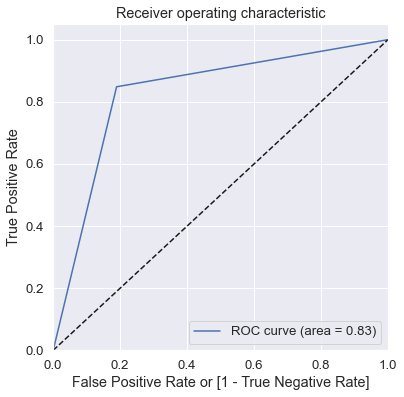

(array([0.        , 0.18930708, 1.        ]),
 array([0.        , 0.84833001, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [ ]:
draw_roc(y_pred_final.churned, y_pred_final.predicted)

In [ ]:
#Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churned_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,mobile_number,churned,churned_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.00000000,0.23459733,0,1,1,1,0,0,0,0,0,0,0
1,1,0.00000000,0.16044910,0,1,1,0,0,0,0,0,0,0,0
2,2,0.00000000,0.31243686,0,1,1,1,1,0,0,0,0,0,0
3,3,0.00000000,0.12300888,0,1,1,0,0,0,0,0,0,0,0
4,4,0.00000000,0.00019279,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
#Now let's calculate Accuracy, Sensitivity and Specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

def calculation_for_cutoffs(y_pred_final):
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix( y_pred_final.churned, y_pred_final[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    
calculation_for_cutoffs(y_pred_final)

                 prob   accuracy      sensi      speci
0.00000000 0.00000000 0.50000000 0.00000000 1.00000000
0.10000000 0.10000000 0.64936441 0.32078764 0.97794118
0.20000000 0.20000000 0.71728564 0.47856431 0.95600698
0.30000000 0.30000000 0.76651296 0.60655533 0.92647059
0.40000000 0.40000000 0.80520937 0.71909272 0.89132602
0.50000000 0.50000000 0.82951147 0.81069292 0.84833001
0.60000000 0.60000000 0.82963609 0.87375374 0.78551844
0.70000000 0.70000000 0.81218843 0.92372881 0.70064806
0.80000000 0.80000000 0.75024925 0.96261216 0.53788634
0.90000000 0.90000000 0.57390329 0.98778664 0.16001994


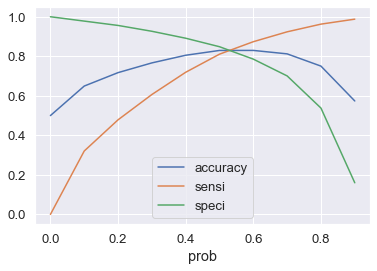

In [ ]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the Curve above, 0.57 is the Optimum Point to take it as a cutoff probability.

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.churned_prob.map( lambda x: 1 if x > 0.57 else 0)
y_pred_final.head()

,mobile_number,churned,churned_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.00000000,0.23459733,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.00000000,0.16044910,0,1,1,0,0,0,0,0,0,0,0,0
2,2,0.00000000,0.31243686,0,1,1,1,1,0,0,0,0,0,0,0
3,3,0.00000000,0.12300888,0,1,1,0,0,0,0,0,0,0,0,0
4,4,0.00000000,0.00019279,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
metrics.accuracy_score( y_pred_final.churned, y_pred_final.final_predicted)

0.8311316051844466

In [ ]:
metrics.confusion_matrix( y_pred_final.churned, y_pred_final.final_predicted )

array([[6863, 1161],
       [1549, 6475]], dtype=int64)

In [ ]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_pred_final['predicted'] = y_pred_final.churned_prob.map( lambda x: 1 if x > 0.5 else 0)

#### Model Evaluation

In [ ]:
from sklearn import metrics
confusion = metrics.confusion_matrix( y_pred_final.churned, y_pred_final.predicted )
confusion

array([[6505, 1519],
       [1217, 6807]], dtype=int64)

In [ ]:
metrics.accuracy_score( y_pred_final.churned, y_pred_final.predicted)

0.8295114656031904

In [ ]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
print ('Sensitivity = ', TP / float(TP+FN))
print ('Specificity = ', TN / float(TN+FP))
#Calculate false postive rate - predicting churn when customer does not have churned
print()
print ('False Positive Rate = ', FP/ float(TN+FP))

#Positive predictive value 
print ('Positive Predictive Value',TP / float(TP+FP))

#Negative predictive value
print ('Negative Predictive Value', TN / float(TN+ FN))

Sensitivity =  0.8423983423983424
Specificity =  0.8175594523180398

False Positive Rate =  0.18244054768196014
Positive Predictive Value 0.8106929212362911
Negative Predictive Value 0.8483300099700898


***Here with Logistic Regression, we get below important features--***
- usage_diff_og_mou
- total_rech_num_8
- loc_og_t2m_mou_8
- loc_ic_t2m_mou_7
- last_day_rch_amt_8
- vol_2g_mb_8

<h4><font size="5" color="brown">Actionable Insights Based On Supporting Evidence</h4>

<h2><font size="4" color="red">We tried 4 different approches namely Decision Tree, Simple RFE, Logistic Regression & LASSO Regression :--</h2>

<table >
  <tr>
    <th> <font size="4" color="green">Model</th>
    <th> <font size="4" color="green">Important features</th>
  </tr>
  <tr>
    <td><font size="4">Lasso</td>
    <td> 
        <ul>
          <li>roam_og_mou_7</li>
          <li>arpu_7</li>
          <li>usage_diff_og_mou</li>
          <li>total_ic_mou_6</li>    
          <li>total_rech_amt_6</li>
          <li>roam_og_mou_6</li>
        </ul>   
       </td>
  </tr>

<tr>
    <td><font size="4">RFE </td>
    <td>
        <ul>
          <li>loc_og_t2f_mou_8</li>
          <li>day_of_last_rech_8</li>
          <li>isd_og_mou_8</li>
          <li>og_others_7</li>    
          <li>og_others_8</li>
          <li>total_ic_mou_8</li>
         </ul>   
    </td>
  </tr>
  <tr>
    <td><font size="4">Decision Tree</td>
    <td>
        <ul>
         <li>loc_og_t2t_mou_8</li>
          <li>offnet_mou_7</li>
          <li>loc_og_t2m_mou_6</li>
          <li>offnet_mou_6</li>    
          <li>roam_og_mou_8</li>
          <li>onnet_mou_7</li>
         </ul>   
     </td>
  </tr>
  
   <tr>
        <td><font size="4">Logistic regression</td>
        <td> 
            <ul>
               <li>usage_diff_og_mou</li>
               <li>total_rech_num_8</li>
               <li>loc_og_t2m_mou_8</li>
               <li>loc_ic_t2m_mou_7</li>
               <li>last_day_rch_amt_8</li>
               <li>vol_2g_mb_8</li>
               <li>roam_ic_mou_6</li>
               <li>sep_vbc_3g</li>
             </ul>                   
         </td>
    </tr>
</table>
    
<h3><font size="4" color="red">Summary of Important Features :--</h2>
<table >
  <tr>
    <th> <font size="4" color="green">Feature</th>
  </tr>
  <tr>
    <td>Roaming Outgoing Minutes of voice call in 6th and 7th</td>
  </tr>
  <tr>
    <td>Total Recharge in Previous Months</td>  
  </tr>
  <tr>
    <td>ISD Outgoing and Incoming voice call </td>  
  </tr>
    <tr>
    <td>Average Revernue Per user in last 3 months here </td>  
  </tr>
    <tr>
    <td>Outgoing Others </td> 
  </tr>
    <tr>
    <td>Mobile Internet Usage </td>   
  </tr>
    <tr>
    <td>All types of calls within and outside the operator network</td>   
  </tr>  
</table>

<h4><font size="5" color="brown">Now Plotting Important Features which are used for Predictions</h4>

### 1 : Average Revenue Per User
- In the below graph, arpu of users is plotted for 3 months. We can see that arpu of churned customers have reduced drastically from 7th to 8th month.

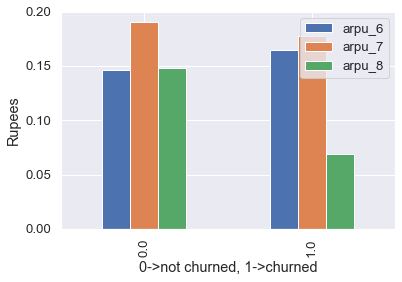

In [ ]:
df.groupby('churned')['arpu_6','arpu_7','arpu_8'].mean().plot.bar()
plt.xlabel('0->not churned, 1->churned')
plt.ylabel('Rupees')
plt.show()

### 2 : Average Calls within the Same Network
- In the below graph, avg calls within the same network of users is plotted for 3 months. We can see that the calls usage of churned customers have reduced drastically.

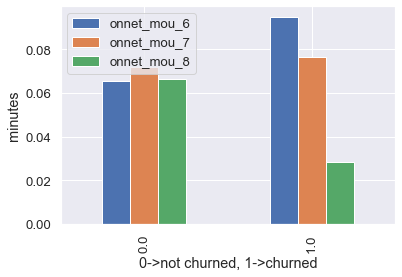

In [ ]:
df.groupby('churned')['onnet_mou_6','onnet_mou_7','onnet_mou_8'].mean().plot.bar()
plt.xlabel('0->not churned, 1->churned')
plt.ylabel('minutes')
plt.show()

### 3 : Average Total Recharge
- In the below graph, total avg recharge of users is plotted for 3 months. We can see that recharge amount of churned customers have reduced drastically.

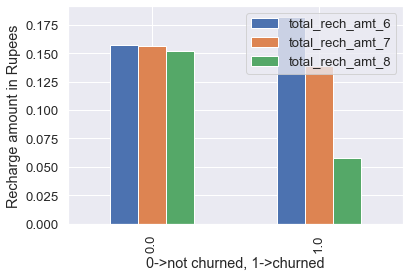

In [ ]:
df.groupby('churned')['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'].mean().plot.bar()
plt.xlabel('0->not churned, 1->churned')
plt.ylabel('Recharge amount in Rupees')
plt.show()

### 4 : Outgoing calls to Others
- In the below graph, Outgoing calls of users is plotted for 3 months. We can see that outgoing calls to others of churned customers is extremely low throughout.

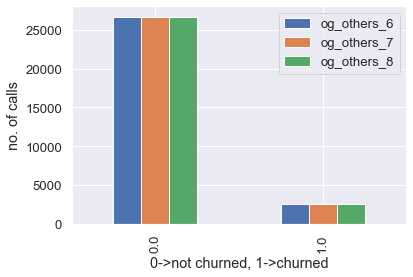

In [ ]:
df.groupby('churned')['og_others_6','og_others_7','og_others_8'].count().plot.bar()
plt.xlabel('0->not churned, 1->churned')
plt.ylabel('no. of calls')
plt.show()

### 5 : Average 2G Volume Consumption in MB
- In the below graph, avg 2G volume consumption of users is plotted for 3 months. We can see that 2G volume of churned customers have reduced gradually.

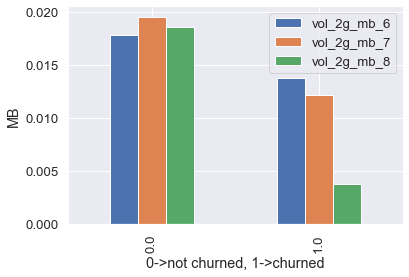

In [ ]:
df.groupby('churned')['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'].mean().plot.bar()
plt.xlabel('0->not churned, 1->churned')
plt.ylabel('MB')
plt.show()

<h4><font size="5" color="brown">Recommended Strategies</h4>

***Recommendation 1-***
- Company have to identify customers with high Average Revenue Per User & track if there 2G consumption is going down if so than company have to address if there is any internet speed issue or make it competitive in terms of plan pricing.

***Recommendation 2-***
- Company have to identify customers with high Average Revenue Per User & track if the outgoing calls to other networks is reducing. If so, than the company have to suggest plans or offers to customer or call the customer ask for the issue he/she facing.

***Recommendation 3-***
- Company have to identify customers with high Average Revenue Per User & track if total rechage value is getting decreased on monthly basis.

***Recommendation 4-***
- Company have to identify customers with high Average Revenue Per User & recommend offers such as casback or coupons on rechare to customers this will basically help in retainning the customers.